# Modelos de Deep Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/refs/heads/main/Bitcoin%20Historical%20Data.csv", thousands=',', decimal='.')
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.sort_index(inplace=True)

df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...
2024-03-20,67854.0,62046.8,68029.5,60850.9,133.53K,9.35%
2024-03-21,65503.8,67860.0,68161.7,64616.1,75.26K,-3.46%
2024-03-22,63785.5,65501.5,66633.3,62328.3,72.43K,-2.62%


In [3]:
# retorno acumulado
def retorno_acumulado(df, columna):
    retorno_diario = (df[columna].diff() / df[columna].shift(1))
    return retorno_diario.cumsum()

def volatilidad(retorno_acum, ventana):
    std_w = retorno_acum.rolling(window=ventana).std()
    return std_w


df["DailyReturn"] = retorno_acumulado(df, "Price")
df["Volatility"] =  volatilidad(df["DailyReturn"], 7)

df

,Price,Open,High,Low,Vol.,Change %,DailyReturn,Volatility
Date,,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%,NaN,NaN
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%,0.000000,NaN
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%,0.000000,NaN
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%,0.000000,NaN
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%,0.000000,NaN
...,...,...,...,...,...,...,...,...
2024-03-20,67854.0,62046.8,68029.5,60850.9,133.53K,9.35%,23.719802,0.043620
2024-03-21,65503.8,67860.0,68161.7,64616.1,75.26K,-3.46%,23.685166,0.036828
2024-03-22,63785.5,65501.5,66633.3,62328.3,72.43K,-2.62%,23.658934,0.034760


In [4]:
timeserie  = df["Price"]

## Split de datos

In [5]:
def split_time_series(data, tau, train_size=7, jump=0):
    """
    train_size:
    tau:
    """
    n_samples = len(data)
    
    dim_train_size = 14
    dim_tau_size = 7
    total_dim = dim_train_size + dim_tau_size * 2

    splits = []
    id_counter = 1
    dim = 1
    split_counter = 0

    for start in range(0, n_samples - train_size - tau*2 + jump, 1):
        if split_counter == 0:
            if start + total_dim > n_samples - train_size - tau * 2 + jump:
                break  # No hay suficientes datos

        x_train_end = start + train_size + jump
        y_tain = x_train_end + tau

        if split_counter < dim_train_size:
            split_type  = "train"
        elif split_counter < dim_train_size + dim_tau_size:
            split_type  = "val"
        elif split_counter < dim_train_size + dim_tau_size*2:
            split_type  = "test"
        else:
            # Reset
            dim += 1
            split_counter = 0
            split_type = "train"
        
        split_dict = {
            "id": id_counter,
            "dim": dim,
            "split": split_type,
            "X": [data.iloc[start:x_train_end]],  
            "y": [data.iloc[x_train_end:y_tain]]
        }

        splits.append(split_dict)

        # Incrementar los contadores
        id_counter += 1
        split_counter += 1

        if split_counter >= total_dim:
            dim += 1
            split_counter = 0

    return splits

array = split_time_series(data=timeserie, tau=1)
df_model = pd.DataFrame(array)

In [6]:
df_model.head(-5)

,id,dim,split,X,y
0,1,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
1,2,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
2,3,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
3,4,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
4,5,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
...,...,...,...,...,...
4974,4975,178,val,"[[61169.3, 62397.7, 61994.5, 63135.8, 68270.1,...",[[66855.3]]
4975,4976,178,val,"[[62397.7, 61994.5, 63135.8, 68270.1, 63792.6,...",[[68172.0]]
4976,4977,178,val,"[[61994.5, 63135.8, 68270.1, 63792.6, 66080.4,...",[[68366.5]]
4977,4978,178,test,"[[63135.8, 68270.1, 63792.6, 66080.4, 66855.3,...",[[68964.8]]


In [7]:
## PENDIENTE
def plot_splits(data, splits, horizon, dim=1):
    return 1

## Entrenamiento y validación

In [8]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, root_mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
devices = tf.config.list_physical_devices()
print("Available devices:")
for device in devices:
    print(device)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using GPU.")
    for gpu in gpus:
        gpu_details = tf.config.experimental.get_device_details(gpu)
        print(f"GPU details: {gpu_details}")
else:
    print("TensorFlow is not using GPU.")

Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
TensorFlow is using GPU.
GPU details: {'device_name': 'NVIDIA GeForce RTX 2060 SUPER', 'compute_capability': (7, 5)}


In [10]:
dim = 60

df_dim = df_model.loc[df_model["dim"] == dim]

split = "train"
X_train, y_train = df_dim.loc[df_dim["split"] == split, "X"].tolist(), df_dim.loc[df_dim["split"] == split, "y"].tolist()
X_train, y_train = np.array([np.array(xi).flatten() for xi in X_train]), np.array([np.array(yi).flatten() for yi in y_train])


split = "val"
X_val, y_val = df_dim.loc[df_dim["split"] == split, "X"].tolist(), df_dim.loc[df_dim["split"] == split, "y"].tolist()
X_val, y_val = np.array([np.array(xi).flatten() for xi in X_val]), np.array([np.array(yi).flatten() for yi in y_val])

split = "test"
X_test, y_test = df_dim.loc[df_dim["split"] == split, "X"].tolist(), df_dim.loc[df_dim["split"] == split, "y"].tolist()
X_test, y_test = np.array([np.array(xi).flatten() for xi in X_test]), np.array([np.array(yi).flatten() for yi in y_test])

# Re-dimensionar los datos para RNN/LSTM
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_rnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


#pendiente llevarlo a función
def get_batch(df, dim):
    dim_df = df_model.loc[df_model["dim"] == 100]

    # return X_train, y_train, X_val, y_val

X_train

array([[252.1, 269.2, 263.3, 236.2, 234. , 231.8, 218.5],
       [269.2, 263.3, 236.2, 234. , 231.8, 218.5, 225.3],
       [263.3, 236.2, 234. , 231.8, 218.5, 225.3, 238.9],
       [236.2, 234. , 231.8, 218.5, 225.3, 238.9, 227.4],
       [234. , 231.8, 218.5, 225.3, 238.9, 227.4, 226.6],
       [231.8, 218.5, 225.3, 238.9, 227.4, 226.6, 216.5],
       [218.5, 225.3, 238.9, 227.4, 226.6, 216.5, 223. ],
       [225.3, 238.9, 227.4, 226.6, 216.5, 223. , 227.7],
       [238.9, 227.4, 226.6, 216.5, 223. , 227.7, 223.7],
       [227.4, 226.6, 216.5, 223. , 227.7, 223.7, 220.3],
       [226.6, 216.5, 223. , 227.7, 223.7, 220.3, 219.7],
       [216.5, 223. , 227.7, 223.7, 220.3, 219.7, 218.8],
       [223. , 227.7, 223.7, 220.3, 219.7, 218.8, 221.8],
       [227.7, 223.7, 220.3, 219.7, 218.8, 221.8, 236.2]])

In [11]:
def calculate_metrics(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)
    metrics = {
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": rmse,
        "MSE": rmse**2,
        "R2": r2_score(y_true, y_pred)
    }
    return metrics


def create_and_train_model(model_type, neurons, dropout_rate, batch_size, X_train, y_train, X_val, y_val):
    
    
    model = Sequential()
    if model_type == 'MLP':
        # (samples, features)
        model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1))

    elif model_type == 'RNN':
        #(samples, timesteps, features)
        model.add(SimpleRNN(neurons, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1))

    elif model_type == 'LSTM':
        #(samples, timesteps, features)
        model.add(LSTM(neurons, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1))

    else:
        raise ValueError("Modeo inválido")

    model.compile(optimizer=Adam(), loss='mse', metrics=['mape','mae', 'mse'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'models/best_model_{model_type}.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train, y_train, epochs=500, batch_size=batch_size,
                        validation_data=(X_val, y_val), verbose=1,
                        callbacks=[early_stopping, model_checkpoint])
    return model, history

In [12]:
model_type = 'MLP'
neurons = 1000
dropout_rate = 0.2
batch_size = 16

model_mlp, history_mlp = create_and_train_model(model_type, neurons, dropout_rate, batch_size,
                                                X_train, y_train, X_val, y_val)


Epoch 1/500


1/1 [==============================] - ETA: 0s - loss: 56863.1211 - mape: 104.6141 - mae: 237.9391 - mse: 56863.1211

1/1 [==============================] - 5s 5s/step - loss: 56863.1211 - mape: 104.6141 - mae: 237.9391 - mse: 56863.1211 - val_loss: 42629.8672 - val_mape: 86.1034 - val_mae: 206.4361 - val_mse: 42629.8672


Epoch 2/500


1/1 [==============================] - ETA: 0s - loss: 38638.3125 - mape: 86.1932 - mae: 196.0620 - mse: 38638.3125

1/1 [==============================] - 0s 91ms/step - loss: 38638.3125 - mape: 86.1932 - mae: 196.0620 - mse: 38638.3125 - val_loss: 26225.9727 - val_mape: 67.5320 - val_mae: 161.9130 - val_mse: 26225.9727


Epoch 3/500


1/1 [==============================] - ETA: 0s - loss: 23819.2500 - mape: 67.4768 - mae: 153.6041 - mse: 23819.2500

1/1 [==============================] - 0s 71ms/step - loss: 23819.2500 - mape: 67.4768 - mae: 153.6041 - mse: 23819.2500 - val_loss: 14054.2051 - val_mape: 49.4312 - val_mae: 118.5173 - val_mse: 14054.2051


Epoch 4/500


1/1 [==============================] - ETA: 0s - loss: 13841.0791 - mape: 51.1354 - mae: 116.5662 - mse: 13841.0791

1/1 [==============================] - 0s 121ms/step - loss: 13841.0791 - mape: 51.1354 - mae: 116.5662 - mse: 13841.0791 - val_loss: 5925.5288 - val_mape: 32.0845 - val_mae: 76.9290 - val_mse: 5925.5288


Epoch 5/500


1/1 [==============================] - ETA: 0s - loss: 5406.4775 - mape: 31.4361 - mae: 71.6225 - mse: 5406.4775

1/1 [==============================] - 0s 86ms/step - loss: 5406.4775 - mape: 31.4361 - mae: 71.6225 - mse: 5406.4775 - val_loss: 1471.3859 - val_mape: 15.9483 - val_mae: 38.2430 - val_mse: 1471.3859


Epoch 6/500


1/1 [==============================] - ETA: 0s - loss: 1377.0458 - mape: 12.5294 - mae: 29.2290 - mse: 1377.0458

1/1 [==============================] - 0s 83ms/step - loss: 1377.0458 - mape: 12.5294 - mae: 29.2290 - mse: 1377.0458 - val_loss: 23.4154 - val_mape: 1.5009 - val_mae: 3.6037 - val_mse: 23.4154


Epoch 7/500


1/1 [==============================] - ETA: 0s - loss: 311.9446 - mape: 6.2087 - mae: 14.2871 - mse: 311.9446

1/1 [==============================] - 0s 35ms/step - loss: 311.9446 - mape: 6.2087 - mae: 14.2871 - mse: 311.9446 - val_loss: 709.8582 - val_mape: 11.0093 - val_mae: 26.3859 - val_mse: 709.8582


Epoch 8/500


1/1 [==============================] - ETA: 0s - loss: 1444.9911 - mape: 14.4687 - mae: 32.5700 - mse: 1444.9911

1/1 [==============================] - 0s 39ms/step - loss: 1444.9911 - mape: 14.4687 - mae: 32.5700 - mse: 1444.9911 - val_loss: 2553.1926 - val_mape: 21.0144 - val_mae: 50.3708 - val_mse: 2553.1926


Epoch 9/500


1/1 [==============================] - ETA: 0s - loss: 2726.3875 - mape: 21.7740 - mae: 49.1816 - mse: 2726.3875

1/1 [==============================] - 0s 39ms/step - loss: 2726.3875 - mape: 21.7740 - mae: 49.1816 - mse: 2726.3875 - val_loss: 4665.1084 - val_mape: 28.4395 - val_mae: 68.1712 - val_mse: 4665.1084


Epoch 10/500


1/1 [==============================] - ETA: 0s - loss: 5450.4106 - mape: 31.4658 - mae: 70.7957 - mse: 5450.4106

1/1 [==============================] - 0s 36ms/step - loss: 5450.4106 - mape: 31.4658 - mae: 70.7957 - mse: 5450.4106 - val_loss: 6305.3281 - val_mape: 33.0755 - val_mae: 79.2855 - val_mse: 6305.3281


Epoch 11/500


1/1 [==============================] - ETA: 0s - loss: 7355.8213 - mape: 36.7867 - mae: 83.1841 - mse: 7355.8213

1/1 [==============================] - 0s 38ms/step - loss: 7355.8213 - mape: 36.7867 - mae: 83.1841 - mse: 7355.8213 - val_loss: 7082.8584 - val_mape: 35.0597 - val_mae: 84.0422 - val_mse: 7082.8584


Epoch 12/500


1/1 [==============================] - ETA: 0s - loss: 6739.2466 - mape: 35.0494 - mae: 79.4621 - mse: 6739.2466

1/1 [==============================] - 0s 32ms/step - loss: 6739.2466 - mape: 35.0494 - mae: 79.4621 - mse: 6739.2466 - val_loss: 7041.5913 - val_mape: 34.9573 - val_mae: 83.7966 - val_mse: 7041.5913


Epoch 13/500


1/1 [==============================] - ETA: 0s - loss: 7175.5962 - mape: 36.2914 - mae: 82.1201 - mse: 7175.5962

1/1 [==============================] - 0s 41ms/step - loss: 7175.5962 - mape: 36.2914 - mae: 82.1201 - mse: 7175.5962 - val_loss: 6299.0366 - val_mape: 33.0593 - val_mae: 79.2462 - val_mse: 6299.0366


Epoch 14/500


1/1 [==============================] - ETA: 0s - loss: 7503.1685 - mape: 37.0536 - mae: 83.4288 - mse: 7503.1685

1/1 [==============================] - 0s 37ms/step - loss: 7503.1685 - mape: 37.0536 - mae: 83.4288 - mse: 7503.1685 - val_loss: 5063.6772 - val_mape: 29.6338 - val_mae: 71.0333 - val_mse: 5063.6772


Epoch 15/500


1/1 [==============================] - ETA: 0s - loss: 5372.5747 - mape: 31.2525 - mae: 70.4689 - mse: 5372.5747

1/1 [==============================] - 0s 38ms/step - loss: 5372.5747 - mape: 31.2525 - mae: 70.4689 - mse: 5372.5747 - val_loss: 3658.7534 - val_mape: 25.1776 - val_mae: 60.3495 - val_mse: 3658.7534


Epoch 16/500


1/1 [==============================] - ETA: 0s - loss: 3398.7026 - mape: 23.4596 - mae: 52.5546 - mse: 3398.7026

1/1 [==============================] - 0s 42ms/step - loss: 3398.7026 - mape: 23.4596 - mae: 52.5546 - mse: 3398.7026 - val_loss: 2355.6697 - val_mape: 20.1831 - val_mae: 48.3753 - val_mse: 2355.6697


In [13]:
model_type = 'RNN'
model_rnn, history_rnn = create_and_train_model(model_type, neurons, dropout_rate, batch_size,
                                                X_train_rnn, y_train, X_val_rnn, y_val)

Epoch 1/500


1/1 [==============================] - ETA: 0s - loss: 52445.4766 - mape: 100.5695 - mae: 228.7608 - mse: 52445.4766

1/1 [==============================] - 1s 1s/step - loss: 52445.4766 - mape: 100.5695 - mae: 228.7608 - mse: 52445.4766 - val_loss: 56429.3242 - val_mape: 99.0615 - val_mae: 237.5073 - val_mse: 56429.3242


Epoch 2/500


1/1 [==============================] - ETA: 0s - loss: 50737.9648 - mape: 98.9240 - mae: 225.0130 - mse: 50737.9648

1/1 [==============================] - 0s 296ms/step - loss: 50737.9648 - mape: 98.9240 - mae: 225.0130 - mse: 50737.9648 - val_loss: 55148.0430 - val_mape: 97.9296 - val_mae: 234.7945 - val_mse: 55148.0430


Epoch 3/500


1/1 [==============================] - ETA: 0s - loss: 49661.8477 - mape: 97.8546 - mae: 222.5969 - mse: 49661.8477

1/1 [==============================] - 0s 120ms/step - loss: 49661.8477 - mape: 97.8546 - mae: 222.5969 - mse: 49661.8477 - val_loss: 54106.2500 - val_mape: 96.9997 - val_mae: 232.5656 - val_mse: 54106.2500


Epoch 4/500


1/1 [==============================] - ETA: 0s - loss: 48520.9883 - mape: 96.7210 - mae: 220.0210 - mse: 48520.9883

1/1 [==============================] - 0s 167ms/step - loss: 48520.9883 - mape: 96.7210 - mae: 220.0210 - mse: 48520.9883 - val_loss: 53104.6445 - val_mape: 96.0972 - val_mae: 230.4023 - val_mse: 53104.6445


Epoch 5/500


1/1 [==============================] - ETA: 0s - loss: 47659.8828 - mape: 95.8372 - mae: 218.0330 - mse: 47659.8828

1/1 [==============================] - 0s 196ms/step - loss: 47659.8828 - mape: 95.8372 - mae: 218.0330 - mse: 47659.8828 - val_loss: 52131.3359 - val_mape: 95.2120 - val_mae: 228.2805 - val_mse: 52131.3359


Epoch 6/500


1/1 [==============================] - ETA: 0s - loss: 46609.0039 - mape: 94.7813 - mae: 215.6246 - mse: 46609.0039

1/1 [==============================] - 0s 107ms/step - loss: 46609.0039 - mape: 94.7813 - mae: 215.6246 - mse: 46609.0039 - val_loss: 51199.7695 - val_mape: 94.3569 - val_mae: 226.2310 - val_mse: 51199.7695


Epoch 7/500


1/1 [==============================] - ETA: 0s - loss: 45801.0430 - mape: 93.9517 - mae: 213.7418 - mse: 45801.0430

1/1 [==============================] - 0s 104ms/step - loss: 45801.0430 - mape: 93.9517 - mae: 213.7418 - mse: 45801.0430 - val_loss: 50316.8555 - val_mape: 93.5393 - val_mae: 224.2712 - val_mse: 50316.8555


Epoch 8/500


1/1 [==============================] - ETA: 0s - loss: 44912.7852 - mape: 93.0440 - mae: 211.6687 - mse: 44912.7852

1/1 [==============================] - 0s 144ms/step - loss: 44912.7852 - mape: 93.0440 - mae: 211.6687 - mse: 44912.7852 - val_loss: 49523.2109 - val_mape: 92.7980 - val_mae: 222.4946 - val_mse: 49523.2109


Epoch 9/500


1/1 [==============================] - ETA: 0s - loss: 44201.0859 - mape: 92.2709 - mae: 209.9436 - mse: 44201.0859

1/1 [==============================] - 0s 278ms/step - loss: 44201.0859 - mape: 92.2709 - mae: 209.9436 - mse: 44201.0859 - val_loss: 48817.2852 - val_mape: 92.1336 - val_mae: 220.9025 - val_mse: 48817.2852


Epoch 10/500


1/1 [==============================] - ETA: 0s - loss: 43517.8125 - mape: 91.5687 - mae: 208.3321 - mse: 43517.8125

1/1 [==============================] - 0s 111ms/step - loss: 43517.8125 - mape: 91.5687 - mae: 208.3321 - mse: 43517.8125 - val_loss: 48184.9180 - val_mape: 91.5344 - val_mae: 219.4664 - val_mse: 48184.9180


Epoch 11/500


1/1 [==============================] - ETA: 0s - loss: 42977.8555 - mape: 91.0113 - mae: 207.0512 - mse: 42977.8555

1/1 [==============================] - 0s 90ms/step - loss: 42977.8555 - mape: 91.0113 - mae: 207.0512 - mse: 42977.8555 - val_loss: 47596.9297 - val_mape: 90.9737 - val_mae: 218.1226 - val_mse: 47596.9297


Epoch 12/500


1/1 [==============================] - ETA: 0s - loss: 42433.5586 - mape: 90.4140 - mae: 205.7120 - mse: 42433.5586

1/1 [==============================] - 0s 105ms/step - loss: 42433.5586 - mape: 90.4140 - mae: 205.7120 - mse: 42433.5586 - val_loss: 47021.4297 - val_mape: 90.4216 - val_mae: 216.7994 - val_mse: 47021.4297


Epoch 13/500


1/1 [==============================] - ETA: 0s - loss: 41918.3633 - mape: 89.8563 - mae: 204.4510 - mse: 41918.3633

1/1 [==============================] - 0s 96ms/step - loss: 41918.3633 - mape: 89.8563 - mae: 204.4510 - mse: 41918.3633 - val_loss: 46487.4375 - val_mape: 89.9061 - val_mae: 215.5642 - val_mse: 46487.4375


Epoch 14/500


1/1 [==============================] - ETA: 0s - loss: 41515.3711 - mape: 89.4268 - mae: 203.4688 - mse: 41515.3711

1/1 [==============================] - 0s 102ms/step - loss: 41515.3711 - mape: 89.4268 - mae: 203.4688 - mse: 41515.3711 - val_loss: 45999.8555 - val_mape: 89.4329 - val_mae: 214.4301 - val_mse: 45999.8555


Epoch 15/500


1/1 [==============================] - ETA: 0s - loss: 40812.1992 - mape: 88.6631 - mae: 201.7353 - mse: 40812.1992

1/1 [==============================] - 0s 265ms/step - loss: 40812.1992 - mape: 88.6631 - mae: 201.7353 - mse: 40812.1992 - val_loss: 45537.6172 - val_mape: 88.9819 - val_mae: 213.3494 - val_mse: 45537.6172


Epoch 16/500


1/1 [==============================] - ETA: 0s - loss: 40534.0273 - mape: 88.3824 - mae: 201.0741 - mse: 40534.0273

1/1 [==============================] - 0s 169ms/step - loss: 40534.0273 - mape: 88.3824 - mae: 201.0741 - mse: 40534.0273 - val_loss: 45101.1445 - val_mape: 88.5540 - val_mae: 212.3239 - val_mse: 45101.1445


Epoch 17/500


1/1 [==============================] - ETA: 0s - loss: 40150.8672 - mape: 87.9532 - mae: 200.1086 - mse: 40150.8672

1/1 [==============================] - 0s 81ms/step - loss: 40150.8672 - mape: 87.9532 - mae: 200.1086 - mse: 40150.8672 - val_loss: 44694.1250 - val_mape: 88.1531 - val_mae: 211.3631 - val_mse: 44694.1250


Epoch 18/500


1/1 [==============================] - ETA: 0s - loss: 39720.5938 - mape: 87.4668 - mae: 199.0161 - mse: 39720.5938

1/1 [==============================] - 0s 92ms/step - loss: 39720.5938 - mape: 87.4668 - mae: 199.0161 - mse: 39720.5938 - val_loss: 44303.3203 - val_mape: 87.7665 - val_mae: 210.4365 - val_mse: 44303.3203


Epoch 19/500


1/1 [==============================] - ETA: 0s - loss: 39369.9883 - mape: 87.0723 - mae: 198.1261 - mse: 39369.9883

1/1 [==============================] - 0s 160ms/step - loss: 39369.9883 - mape: 87.0723 - mae: 198.1261 - mse: 39369.9883 - val_loss: 43913.3203 - val_mape: 87.3790 - val_mae: 209.5078 - val_mse: 43913.3203


Epoch 20/500


1/1 [==============================] - ETA: 0s - loss: 38973.1172 - mape: 86.6397 - mae: 197.1341 - mse: 38973.1172

1/1 [==============================] - 0s 88ms/step - loss: 38973.1172 - mape: 86.6397 - mae: 197.1341 - mse: 38973.1172 - val_loss: 43517.6445 - val_mape: 86.9841 - val_mae: 208.5614 - val_mse: 43517.6445


Epoch 21/500


1/1 [==============================] - ETA: 0s - loss: 38506.7305 - mape: 86.1095 - mae: 195.9386 - mse: 38506.7305

1/1 [==============================] - 0s 90ms/step - loss: 38506.7305 - mape: 86.1095 - mae: 195.9386 - mse: 38506.7305 - val_loss: 43117.9102 - val_mape: 86.5834 - val_mae: 207.6009 - val_mse: 43117.9102


Epoch 22/500


1/1 [==============================] - ETA: 0s - loss: 38293.5859 - mape: 85.8800 - mae: 195.4067 - mse: 38293.5859

1/1 [==============================] - 0s 96ms/step - loss: 38293.5859 - mape: 85.8800 - mae: 195.4067 - mse: 38293.5859 - val_loss: 42727.6484 - val_mape: 86.1903 - val_mae: 206.6588 - val_mse: 42727.6484


Epoch 23/500


1/1 [==============================] - ETA: 0s - loss: 37816.7500 - mape: 85.3357 - mae: 194.1765 - mse: 37816.7500

1/1 [==============================] - 0s 95ms/step - loss: 37816.7500 - mape: 85.3357 - mae: 194.1765 - mse: 37816.7500 - val_loss: 42342.4102 - val_mape: 85.8005 - val_mae: 205.7246 - val_mse: 42342.4102


Epoch 24/500


1/1 [==============================] - ETA: 0s - loss: 37600.6602 - mape: 85.0924 - mae: 193.6216 - mse: 37600.6602

1/1 [==============================] - 0s 192ms/step - loss: 37600.6602 - mape: 85.0924 - mae: 193.6216 - mse: 37600.6602 - val_loss: 41958.4961 - val_mape: 85.4103 - val_mae: 204.7894 - val_mse: 41958.4961


Epoch 25/500


1/1 [==============================] - ETA: 0s - loss: 37171.1172 - mape: 84.5982 - mae: 192.5031 - mse: 37171.1172

1/1 [==============================] - 0s 204ms/step - loss: 37171.1172 - mape: 84.5982 - mae: 192.5031 - mse: 37171.1172 - val_loss: 41575.6797 - val_mape: 85.0194 - val_mae: 203.8526 - val_mse: 41575.6797


Epoch 26/500


1/1 [==============================] - ETA: 0s - loss: 36698.3398 - mape: 84.0704 - mae: 191.2909 - mse: 36698.3398

1/1 [==============================] - 0s 94ms/step - loss: 36698.3398 - mape: 84.0704 - mae: 191.2909 - mse: 36698.3398 - val_loss: 41193.9492 - val_mape: 84.6279 - val_mae: 202.9142 - val_mse: 41193.9492


Epoch 27/500


1/1 [==============================] - ETA: 0s - loss: 36445.2695 - mape: 83.7639 - mae: 190.6090 - mse: 36445.2695

1/1 [==============================] - 0s 105ms/step - loss: 36445.2695 - mape: 83.7639 - mae: 190.6090 - mse: 36445.2695 - val_loss: 40813.5391 - val_mape: 84.2359 - val_mae: 201.9746 - val_mse: 40813.5391


Epoch 28/500


1/1 [==============================] - ETA: 0s - loss: 36108.1953 - mape: 83.3635 - mae: 189.7103 - mse: 36108.1953

1/1 [==============================] - 0s 100ms/step - loss: 36108.1953 - mape: 83.3635 - mae: 189.7103 - mse: 36108.1953 - val_loss: 40434.4375 - val_mape: 83.8434 - val_mae: 201.0339 - val_mse: 40434.4375


Epoch 29/500


1/1 [==============================] - ETA: 0s - loss: 35768.5156 - mape: 82.9936 - mae: 188.8454 - mse: 35768.5156

1/1 [==============================] - 0s 99ms/step - loss: 35768.5156 - mape: 82.9936 - mae: 188.8454 - mse: 35768.5156 - val_loss: 40057.0078 - val_mape: 83.4508 - val_mae: 200.0930 - val_mse: 40057.0078


Epoch 30/500


1/1 [==============================] - ETA: 0s - loss: 35499.7656 - mape: 82.6555 - mae: 188.1019 - mse: 35499.7656

1/1 [==============================] - 0s 90ms/step - loss: 35499.7656 - mape: 82.6555 - mae: 188.1019 - mse: 35499.7656 - val_loss: 39681.3828 - val_mape: 83.0583 - val_mae: 199.1521 - val_mse: 39681.3828


Epoch 31/500


1/1 [==============================] - ETA: 0s - loss: 34952.7852 - mape: 82.0233 - mae: 186.6564 - mse: 34952.7852

1/1 [==============================] - 0s 104ms/step - loss: 34952.7852 - mape: 82.0233 - mae: 186.6564 - mse: 34952.7852 - val_loss: 39307.5391 - val_mape: 82.6657 - val_mae: 198.2113 - val_mse: 39307.5391


Epoch 32/500


1/1 [==============================] - ETA: 0s - loss: 34551.9883 - mape: 81.5635 - mae: 185.5973 - mse: 34551.9883

1/1 [==============================] - 0s 91ms/step - loss: 34551.9883 - mape: 81.5635 - mae: 185.5973 - mse: 34551.9883 - val_loss: 38935.2812 - val_mape: 82.2730 - val_mae: 197.2701 - val_mse: 38935.2812


Epoch 33/500


1/1 [==============================] - ETA: 0s - loss: 34230.0391 - mape: 81.1499 - mae: 184.6890 - mse: 34230.0391

1/1 [==============================] - 0s 90ms/step - loss: 34230.0391 - mape: 81.1499 - mae: 184.6890 - mse: 34230.0391 - val_loss: 38564.8164 - val_mape: 81.8803 - val_mae: 196.3288 - val_mse: 38564.8164


Epoch 34/500


1/1 [==============================] - ETA: 0s - loss: 33987.2930 - mape: 80.8709 - mae: 184.0451 - mse: 33987.2930

1/1 [==============================] - 0s 119ms/step - loss: 33987.2930 - mape: 80.8709 - mae: 184.0451 - mse: 33987.2930 - val_loss: 38196.6445 - val_mape: 81.4881 - val_mae: 195.3889 - val_mse: 38196.6445


Epoch 35/500


1/1 [==============================] - ETA: 0s - loss: 33615.5820 - mape: 80.4277 - mae: 183.0356 - mse: 33615.5820

1/1 [==============================] - 0s 109ms/step - loss: 33615.5820 - mape: 80.4277 - mae: 183.0356 - mse: 33615.5820 - val_loss: 37830.5430 - val_mape: 81.0963 - val_mae: 194.4498 - val_mse: 37830.5430


Epoch 36/500


1/1 [==============================] - ETA: 0s - loss: 33351.4922 - mape: 80.1078 - mae: 182.3115 - mse: 33351.4922

1/1 [==============================] - 0s 130ms/step - loss: 33351.4922 - mape: 80.1078 - mae: 182.3115 - mse: 33351.4922 - val_loss: 37466.7383 - val_mape: 80.7050 - val_mae: 193.5121 - val_mse: 37466.7383


Epoch 37/500


1/1 [==============================] - ETA: 0s - loss: 33097.3203 - mape: 79.7795 - mae: 181.5850 - mse: 33097.3203

1/1 [==============================] - 0s 278ms/step - loss: 33097.3203 - mape: 79.7795 - mae: 181.5850 - mse: 33097.3203 - val_loss: 37105.2656 - val_mape: 80.3144 - val_mae: 192.5759 - val_mse: 37105.2656


Epoch 38/500


1/1 [==============================] - ETA: 0s - loss: 32527.9961 - mape: 79.1069 - mae: 180.0381 - mse: 32527.9961

1/1 [==============================] - 0s 92ms/step - loss: 32527.9961 - mape: 79.1069 - mae: 180.0381 - mse: 32527.9961 - val_loss: 36746.0430 - val_mape: 79.9243 - val_mae: 191.6409 - val_mse: 36746.0430


Epoch 39/500


1/1 [==============================] - ETA: 0s - loss: 32157.6289 - mape: 78.6548 - mae: 179.0096 - mse: 32157.6289

1/1 [==============================] - 0s 93ms/step - loss: 32157.6289 - mape: 78.6548 - mae: 179.0096 - mse: 32157.6289 - val_loss: 36389.1016 - val_mape: 79.5348 - val_mae: 190.7074 - val_mse: 36389.1016


Epoch 40/500


1/1 [==============================] - ETA: 0s - loss: 31858.9277 - mape: 78.2928 - mae: 178.1829 - mse: 31858.9277

1/1 [==============================] - 0s 118ms/step - loss: 31858.9277 - mape: 78.2928 - mae: 178.1829 - mse: 31858.9277 - val_loss: 36034.5625 - val_mape: 79.1460 - val_mae: 189.7756 - val_mse: 36034.5625


Epoch 41/500


1/1 [==============================] - ETA: 0s - loss: 31690.6270 - mape: 78.0637 - mae: 177.6818 - mse: 31690.6270

1/1 [==============================] - 0s 81ms/step - loss: 31690.6270 - mape: 78.0637 - mae: 177.6818 - mse: 31690.6270 - val_loss: 35682.2891 - val_mape: 78.7578 - val_mae: 188.8451 - val_mse: 35682.2891


Epoch 42/500


1/1 [==============================] - ETA: 0s - loss: 31281.2656 - mape: 77.5984 - mae: 176.5840 - mse: 31281.2656

1/1 [==============================] - 0s 77ms/step - loss: 31281.2656 - mape: 77.5984 - mae: 176.5840 - mse: 31281.2656 - val_loss: 35332.4961 - val_mape: 78.3704 - val_mae: 187.9167 - val_mse: 35332.4961


Epoch 43/500


1/1 [==============================] - ETA: 0s - loss: 30895.8887 - mape: 77.0844 - mae: 175.4474 - mse: 30895.8887

1/1 [==============================] - 0s 76ms/step - loss: 30895.8887 - mape: 77.0844 - mae: 175.4474 - mse: 30895.8887 - val_loss: 34985.0859 - val_mape: 77.9838 - val_mae: 186.9901 - val_mse: 34985.0859


Epoch 44/500


1/1 [==============================] - ETA: 0s - loss: 30555.8398 - mape: 76.6465 - mae: 174.4621 - mse: 30555.8398

1/1 [==============================] - 0s 84ms/step - loss: 30555.8398 - mape: 76.6465 - mae: 174.4621 - mse: 30555.8398 - val_loss: 34640.0859 - val_mape: 77.5980 - val_mae: 186.0653 - val_mse: 34640.0859


Epoch 45/500


1/1 [==============================] - ETA: 0s - loss: 30252.5879 - mape: 76.2635 - mae: 173.5923 - mse: 30252.5879

1/1 [==============================] - 0s 133ms/step - loss: 30252.5879 - mape: 76.2635 - mae: 173.5923 - mse: 30252.5879 - val_loss: 34297.5000 - val_mape: 77.2129 - val_mae: 185.1424 - val_mse: 34297.5000


Epoch 46/500


1/1 [==============================] - ETA: 0s - loss: 29829.2656 - mape: 75.7493 - mae: 172.4017 - mse: 29829.2656

1/1 [==============================] - 0s 78ms/step - loss: 29829.2656 - mape: 75.7493 - mae: 172.4017 - mse: 29829.2656 - val_loss: 33957.3359 - val_mape: 76.8287 - val_mae: 184.2214 - val_mse: 33957.3359


Epoch 47/500


1/1 [==============================] - ETA: 0s - loss: 29708.3008 - mape: 75.5747 - mae: 172.0244 - mse: 29708.3008

1/1 [==============================] - 0s 82ms/step - loss: 29708.3008 - mape: 75.5747 - mae: 172.0244 - mse: 29708.3008 - val_loss: 33619.7227 - val_mape: 76.4454 - val_mae: 183.3028 - val_mse: 33619.7227


Epoch 48/500


1/1 [==============================] - ETA: 0s - loss: 29548.1680 - mape: 75.3834 - mae: 171.5771 - mse: 29548.1680

1/1 [==============================] - 0s 76ms/step - loss: 29548.1680 - mape: 75.3834 - mae: 171.5771 - mse: 29548.1680 - val_loss: 33284.7422 - val_mape: 76.0632 - val_mae: 182.3868 - val_mse: 33284.7422


Epoch 49/500


1/1 [==============================] - ETA: 0s - loss: 28799.9785 - mape: 74.4139 - mae: 169.3778 - mse: 28799.9785

1/1 [==============================] - 0s 78ms/step - loss: 28799.9785 - mape: 74.4139 - mae: 169.3778 - mse: 28799.9785 - val_loss: 32952.1289 - val_mape: 75.6818 - val_mae: 181.4727 - val_mse: 32952.1289


Epoch 50/500


1/1 [==============================] - ETA: 0s - loss: 28612.2461 - mape: 74.1836 - mae: 168.8411 - mse: 28612.2461

1/1 [==============================] - 0s 327ms/step - loss: 28612.2461 - mape: 74.1836 - mae: 168.8411 - mse: 28612.2461 - val_loss: 32621.9082 - val_mape: 75.3012 - val_mae: 180.5605 - val_mse: 32621.9082


Epoch 51/500


1/1 [==============================] - ETA: 0s - loss: 28492.5273 - mape: 73.9976 - mae: 168.4473 - mse: 28492.5273

1/1 [==============================] - 0s 80ms/step - loss: 28492.5273 - mape: 73.9976 - mae: 168.4473 - mse: 28492.5273 - val_loss: 32294.2344 - val_mape: 74.9217 - val_mae: 179.6509 - val_mse: 32294.2344


Epoch 52/500


1/1 [==============================] - ETA: 0s - loss: 28217.4902 - mape: 73.6578 - mae: 167.6566 - mse: 28217.4902

1/1 [==============================] - 0s 85ms/step - loss: 28217.4902 - mape: 73.6578 - mae: 167.6566 - mse: 28217.4902 - val_loss: 31969.1543 - val_mape: 74.5432 - val_mae: 178.7438 - val_mse: 31969.1543


Epoch 53/500


1/1 [==============================] - ETA: 0s - loss: 28060.5430 - mape: 73.4327 - mae: 167.1636 - mse: 28060.5430

1/1 [==============================] - 0s 79ms/step - loss: 28060.5430 - mape: 73.4327 - mae: 167.1636 - mse: 28060.5430 - val_loss: 31646.6113 - val_mape: 74.1658 - val_mae: 177.8393 - val_mse: 31646.6113


Epoch 54/500


1/1 [==============================] - ETA: 0s - loss: 27351.7012 - mape: 72.5312 - mae: 165.0812 - mse: 27351.7012

1/1 [==============================] - 0s 122ms/step - loss: 27351.7012 - mape: 72.5312 - mae: 165.0812 - mse: 27351.7012 - val_loss: 31326.4043 - val_mape: 73.7892 - val_mae: 176.9367 - val_mse: 31326.4043


Epoch 55/500


1/1 [==============================] - ETA: 0s - loss: 27143.4551 - mape: 72.2216 - mae: 164.4076 - mse: 27143.4551

1/1 [==============================] - 0s 85ms/step - loss: 27143.4551 - mape: 72.2216 - mae: 164.4076 - mse: 27143.4551 - val_loss: 31008.7012 - val_mape: 73.4137 - val_mae: 176.0366 - val_mse: 31008.7012


Epoch 56/500


1/1 [==============================] - ETA: 0s - loss: 26881.0840 - mape: 71.8827 - mae: 163.6247 - mse: 26881.0840

1/1 [==============================] - 0s 83ms/step - loss: 26881.0840 - mape: 71.8827 - mae: 163.6247 - mse: 26881.0840 - val_loss: 30693.4668 - val_mape: 73.0392 - val_mae: 175.1390 - val_mse: 30693.4668


Epoch 57/500


1/1 [==============================] - ETA: 0s - loss: 26856.7715 - mape: 71.8343 - mae: 163.5304 - mse: 26856.7715

1/1 [==============================] - 0s 81ms/step - loss: 26856.7715 - mape: 71.8343 - mae: 163.5304 - mse: 26856.7715 - val_loss: 30380.7188 - val_mape: 72.6657 - val_mae: 174.2439 - val_mse: 30380.7188


Epoch 58/500


1/1 [==============================] - ETA: 0s - loss: 26404.9824 - mape: 71.2379 - mae: 162.1633 - mse: 26404.9824

1/1 [==============================] - 0s 78ms/step - loss: 26404.9824 - mape: 71.2379 - mae: 162.1633 - mse: 26404.9824 - val_loss: 30070.4727 - val_mape: 72.2933 - val_mae: 173.3513 - val_mse: 30070.4727


Epoch 59/500


1/1 [==============================] - ETA: 0s - loss: 25916.7461 - mape: 70.5810 - mae: 160.6637 - mse: 25916.7461

1/1 [==============================] - 0s 77ms/step - loss: 25916.7461 - mape: 70.5810 - mae: 160.6637 - mse: 25916.7461 - val_loss: 29762.6133 - val_mape: 71.9218 - val_mae: 172.4610 - val_mse: 29762.6133


Epoch 60/500


1/1 [==============================] - ETA: 0s - loss: 25678.6523 - mape: 70.2286 - mae: 159.8866 - mse: 25678.6523

1/1 [==============================] - 0s 80ms/step - loss: 25678.6523 - mape: 70.2286 - mae: 159.8866 - mse: 25678.6523 - val_loss: 29457.2188 - val_mape: 71.5515 - val_mae: 171.5733 - val_mse: 29457.2188


Epoch 61/500


1/1 [==============================] - ETA: 0s - loss: 25601.8750 - mape: 70.1087 - mae: 159.6256 - mse: 25601.8750

1/1 [==============================] - 0s 75ms/step - loss: 25601.8750 - mape: 70.1087 - mae: 159.6256 - mse: 25601.8750 - val_loss: 29154.2871 - val_mape: 71.1822 - val_mae: 170.6883 - val_mse: 29154.2871


Epoch 62/500


1/1 [==============================] - ETA: 0s - loss: 25090.7051 - mape: 69.4382 - mae: 158.0697 - mse: 25090.7051

1/1 [==============================] - 0s 79ms/step - loss: 25090.7051 - mape: 69.4382 - mae: 158.0697 - mse: 25090.7051 - val_loss: 28853.8027 - val_mape: 70.8140 - val_mae: 169.8058 - val_mse: 28853.8027


Epoch 63/500


1/1 [==============================] - ETA: 0s - loss: 25078.6836 - mape: 69.4135 - mae: 158.0205 - mse: 25078.6836

1/1 [==============================] - 0s 151ms/step - loss: 25078.6836 - mape: 69.4135 - mae: 158.0205 - mse: 25078.6836 - val_loss: 28555.8711 - val_mape: 70.4470 - val_mae: 168.9262 - val_mse: 28555.8711


Epoch 64/500


1/1 [==============================] - ETA: 0s - loss: 24673.0508 - mape: 68.8324 - mae: 156.7131 - mse: 24673.0508

1/1 [==============================] - 0s 81ms/step - loss: 24673.0508 - mape: 68.8324 - mae: 156.7131 - mse: 24673.0508 - val_loss: 28260.3477 - val_mape: 70.0811 - val_mae: 168.0492 - val_mse: 28260.3477


Epoch 65/500


1/1 [==============================] - ETA: 0s - loss: 24241.9258 - mape: 68.2353 - mae: 155.3477 - mse: 24241.9258

1/1 [==============================] - 0s 102ms/step - loss: 24241.9258 - mape: 68.2353 - mae: 155.3477 - mse: 24241.9258 - val_loss: 27967.2754 - val_mape: 69.7163 - val_mae: 167.1750 - val_mse: 27967.2754


Epoch 66/500


1/1 [==============================] - ETA: 0s - loss: 24024.8438 - mape: 67.9058 - mae: 154.6194 - mse: 24024.8438

1/1 [==============================] - 0s 76ms/step - loss: 24024.8438 - mape: 67.9058 - mae: 154.6194 - mse: 24024.8438 - val_loss: 27676.5000 - val_mape: 69.3525 - val_mae: 166.3030 - val_mse: 27676.5000


Epoch 67/500


1/1 [==============================] - ETA: 0s - loss: 23654.2188 - mape: 67.3964 - mae: 153.4429 - mse: 23654.2188

1/1 [==============================] - 0s 98ms/step - loss: 23654.2188 - mape: 67.3964 - mae: 153.4429 - mse: 23654.2188 - val_loss: 27388.0820 - val_mape: 68.9898 - val_mae: 165.4336 - val_mse: 27388.0820


Epoch 68/500


1/1 [==============================] - ETA: 0s - loss: 23365.7090 - mape: 66.9819 - mae: 152.5030 - mse: 23365.7090

1/1 [==============================] - 0s 80ms/step - loss: 23365.7090 - mape: 66.9819 - mae: 152.5030 - mse: 23365.7090 - val_loss: 27102.0000 - val_mape: 68.6280 - val_mae: 164.5667 - val_mse: 27102.0000


Epoch 69/500


1/1 [==============================] - ETA: 0s - loss: 23408.6562 - mape: 67.0111 - mae: 152.5972 - mse: 23408.6562

1/1 [==============================] - 0s 81ms/step - loss: 23408.6562 - mape: 67.0111 - mae: 152.5972 - mse: 23408.6562 - val_loss: 26818.3711 - val_mape: 68.2676 - val_mae: 163.7027 - val_mse: 26818.3711


Epoch 70/500


1/1 [==============================] - ETA: 0s - loss: 23196.6055 - mape: 66.7581 - mae: 151.9748 - mse: 23196.6055

1/1 [==============================] - 0s 76ms/step - loss: 23196.6055 - mape: 66.7581 - mae: 151.9748 - mse: 23196.6055 - val_loss: 26537.1211 - val_mape: 67.9082 - val_mae: 162.8414 - val_mse: 26537.1211


Epoch 71/500


1/1 [==============================] - ETA: 0s - loss: 22802.5488 - mape: 66.1486 - mae: 150.6228 - mse: 22802.5488

1/1 [==============================] - 0s 78ms/step - loss: 22802.5488 - mape: 66.1486 - mae: 150.6228 - mse: 22802.5488 - val_loss: 26258.2871 - val_mape: 67.5500 - val_mae: 161.9830 - val_mse: 26258.2871


Epoch 72/500


1/1 [==============================] - ETA: 0s - loss: 22503.9512 - mape: 65.7306 - mae: 149.6565 - mse: 22503.9512

1/1 [==============================] - 0s 74ms/step - loss: 22503.9512 - mape: 65.7306 - mae: 149.6565 - mse: 22503.9512 - val_loss: 25981.8145 - val_mape: 67.1930 - val_mae: 161.1273 - val_mse: 25981.8145


Epoch 73/500


1/1 [==============================] - ETA: 0s - loss: 22336.7441 - mape: 65.4606 - mae: 149.0625 - mse: 22336.7441

1/1 [==============================] - 0s 80ms/step - loss: 22336.7441 - mape: 65.4606 - mae: 149.0625 - mse: 22336.7441 - val_loss: 25707.7285 - val_mape: 66.8372 - val_mae: 160.2745 - val_mse: 25707.7285


Epoch 74/500


1/1 [==============================] - ETA: 0s - loss: 21773.1973 - mape: 64.6302 - mae: 147.1713 - mse: 21773.1973

1/1 [==============================] - 0s 77ms/step - loss: 21773.1973 - mape: 64.6302 - mae: 147.1713 - mse: 21773.1973 - val_loss: 25435.9062 - val_mape: 66.4825 - val_mae: 159.4243 - val_mse: 25435.9062


Epoch 75/500


1/1 [==============================] - ETA: 0s - loss: 21589.4336 - mape: 64.3735 - mae: 146.5735 - mse: 21589.4336

1/1 [==============================] - 0s 81ms/step - loss: 21589.4336 - mape: 64.3735 - mae: 146.5735 - mse: 21589.4336 - val_loss: 25166.3457 - val_mape: 66.1288 - val_mae: 158.5766 - val_mse: 25166.3457


Epoch 76/500


1/1 [==============================] - ETA: 0s - loss: 21517.1660 - mape: 64.2270 - mae: 146.2730 - mse: 21517.1660

1/1 [==============================] - 0s 77ms/step - loss: 21517.1660 - mape: 64.2270 - mae: 146.2730 - mse: 21517.1660 - val_loss: 24899.1602 - val_mape: 65.7764 - val_mae: 157.7319 - val_mse: 24899.1602


Epoch 77/500


1/1 [==============================] - ETA: 0s - loss: 21268.3633 - mape: 63.8751 - mae: 145.4533 - mse: 21268.3633

1/1 [==============================] - 0s 77ms/step - loss: 21268.3633 - mape: 63.8751 - mae: 145.4533 - mse: 21268.3633 - val_loss: 24634.2246 - val_mape: 65.4250 - val_mae: 156.8898 - val_mse: 24634.2246


Epoch 78/500


1/1 [==============================] - ETA: 0s - loss: 20966.4277 - mape: 63.4310 - mae: 144.4338 - mse: 20966.4277

1/1 [==============================] - 0s 327ms/step - loss: 20966.4277 - mape: 63.4310 - mae: 144.4338 - mse: 20966.4277 - val_loss: 24371.4941 - val_mape: 65.0747 - val_mae: 156.0503 - val_mse: 24371.4941


Epoch 79/500


1/1 [==============================] - ETA: 0s - loss: 20600.0449 - mape: 62.8417 - mae: 143.1204 - mse: 20600.0449

1/1 [==============================] - 0s 83ms/step - loss: 20600.0449 - mape: 62.8417 - mae: 143.1204 - mse: 20600.0449 - val_loss: 24111.0098 - val_mape: 64.7256 - val_mae: 155.2134 - val_mse: 24111.0098


Epoch 80/500


1/1 [==============================] - ETA: 0s - loss: 20791.2031 - mape: 63.1417 - mae: 143.7949 - mse: 20791.2031

1/1 [==============================] - 0s 77ms/step - loss: 20791.2031 - mape: 63.1417 - mae: 143.7949 - mse: 20791.2031 - val_loss: 23852.7852 - val_mape: 64.3776 - val_mae: 154.3794 - val_mse: 23852.7852


Epoch 81/500


1/1 [==============================] - ETA: 0s - loss: 20284.4805 - mape: 62.3845 - mae: 142.0551 - mse: 20284.4805

1/1 [==============================] - 0s 80ms/step - loss: 20284.4805 - mape: 62.3845 - mae: 142.0551 - mse: 20284.4805 - val_loss: 23596.7812 - val_mape: 64.0307 - val_mae: 153.5480 - val_mse: 23596.7812


Epoch 82/500


1/1 [==============================] - ETA: 0s - loss: 20032.9473 - mape: 61.9862 - mae: 141.1586 - mse: 20032.9473

1/1 [==============================] - 0s 80ms/step - loss: 20032.9473 - mape: 61.9862 - mae: 141.1586 - mse: 20032.9473 - val_loss: 23343.0039 - val_mape: 63.6849 - val_mae: 152.7194 - val_mse: 23343.0039


Epoch 83/500


1/1 [==============================] - ETA: 0s - loss: 19762.8105 - mape: 61.5341 - mae: 140.1558 - mse: 19762.8105

1/1 [==============================] - 0s 81ms/step - loss: 19762.8105 - mape: 61.5341 - mae: 140.1558 - mse: 19762.8105 - val_loss: 23091.4746 - val_mape: 63.3404 - val_mae: 151.8936 - val_mse: 23091.4746


Epoch 84/500


1/1 [==============================] - ETA: 0s - loss: 19404.0957 - mape: 60.9832 - mae: 138.8913 - mse: 19404.0957

1/1 [==============================] - 0s 93ms/step - loss: 19404.0957 - mape: 60.9832 - mae: 138.8913 - mse: 19404.0957 - val_loss: 22842.0977 - val_mape: 62.9970 - val_mae: 151.0705 - val_mse: 22842.0977


Epoch 85/500


1/1 [==============================] - ETA: 0s - loss: 19505.7500 - mape: 61.1175 - mae: 139.2171 - mse: 19505.7500

1/1 [==============================] - 0s 95ms/step - loss: 19505.7500 - mape: 61.1175 - mae: 139.2171 - mse: 19505.7500 - val_loss: 22594.9355 - val_mape: 62.6548 - val_mae: 150.2502 - val_mse: 22594.9355


Epoch 86/500


1/1 [==============================] - ETA: 0s - loss: 19292.0566 - mape: 60.7935 - mae: 138.4693 - mse: 19292.0566

1/1 [==============================] - 0s 96ms/step - loss: 19292.0566 - mape: 60.7935 - mae: 138.4693 - mse: 19292.0566 - val_loss: 22349.9277 - val_mape: 62.3136 - val_mae: 149.4327 - val_mse: 22349.9277


Epoch 87/500


1/1 [==============================] - ETA: 0s - loss: 18759.8613 - mape: 59.9542 - mae: 136.5537 - mse: 18759.8613

1/1 [==============================] - 0s 96ms/step - loss: 18759.8613 - mape: 59.9542 - mae: 136.5537 - mse: 18759.8613 - val_loss: 22107.1055 - val_mape: 61.9737 - val_mae: 148.6180 - val_mse: 22107.1055


Epoch 88/500


1/1 [==============================] - ETA: 0s - loss: 18638.0840 - mape: 59.7322 - mae: 136.0709 - mse: 18638.0840

1/1 [==============================] - 0s 100ms/step - loss: 18638.0840 - mape: 59.7322 - mae: 136.0709 - mse: 18638.0840 - val_loss: 21866.3945 - val_mape: 61.6349 - val_mae: 147.8059 - val_mse: 21866.3945


Epoch 89/500


1/1 [==============================] - ETA: 0s - loss: 18428.8848 - mape: 59.4235 - mae: 135.3468 - mse: 18428.8848

1/1 [==============================] - 0s 92ms/step - loss: 18428.8848 - mape: 59.4235 - mae: 135.3468 - mse: 18428.8848 - val_loss: 21627.8164 - val_mape: 61.2972 - val_mae: 146.9967 - val_mse: 21627.8164


Epoch 90/500


1/1 [==============================] - ETA: 0s - loss: 18225.5684 - mape: 59.0875 - mae: 134.5851 - mse: 18225.5684

1/1 [==============================] - 0s 183ms/step - loss: 18225.5684 - mape: 59.0875 - mae: 134.5851 - mse: 18225.5684 - val_loss: 21391.3340 - val_mape: 60.9607 - val_mae: 146.1900 - val_mse: 21391.3340


Epoch 91/500


1/1 [==============================] - ETA: 0s - loss: 17885.0488 - mape: 58.5527 - mae: 133.3439 - mse: 17885.0488

1/1 [==============================] - 0s 96ms/step - loss: 17885.0488 - mape: 58.5527 - mae: 133.3439 - mse: 17885.0488 - val_loss: 21157.0137 - val_mape: 60.6254 - val_mae: 145.3864 - val_mse: 21157.0137


Epoch 92/500


1/1 [==============================] - ETA: 0s - loss: 17839.0684 - mape: 58.4289 - mae: 133.1094 - mse: 17839.0684

1/1 [==============================] - 0s 100ms/step - loss: 17839.0684 - mape: 58.4289 - mae: 133.1094 - mse: 17839.0684 - val_loss: 20924.8008 - val_mape: 60.2913 - val_mae: 144.5856 - val_mse: 20924.8008


Epoch 93/500


1/1 [==============================] - ETA: 0s - loss: 17643.7812 - mape: 58.1017 - mae: 132.3690 - mse: 17643.7812

1/1 [==============================] - 0s 93ms/step - loss: 17643.7812 - mape: 58.1017 - mae: 132.3690 - mse: 17643.7812 - val_loss: 20694.7148 - val_mape: 59.9584 - val_mae: 143.7877 - val_mse: 20694.7148


Epoch 94/500


1/1 [==============================] - ETA: 0s - loss: 17657.8535 - mape: 58.1698 - mae: 132.4888 - mse: 17657.8535

1/1 [==============================] - 0s 78ms/step - loss: 17657.8535 - mape: 58.1698 - mae: 132.4888 - mse: 17657.8535 - val_loss: 20466.7188 - val_mape: 59.6267 - val_mae: 142.9927 - val_mse: 20466.7188


Epoch 95/500


1/1 [==============================] - ETA: 0s - loss: 17162.1406 - mape: 57.3343 - mae: 130.5947 - mse: 17162.1406

1/1 [==============================] - 0s 77ms/step - loss: 17162.1406 - mape: 57.3343 - mae: 130.5947 - mse: 17162.1406 - val_loss: 20240.8086 - val_mape: 59.2962 - val_mae: 142.2006 - val_mse: 20240.8086


Epoch 96/500


1/1 [==============================] - ETA: 0s - loss: 17159.3594 - mape: 57.3350 - mae: 130.5922 - mse: 17159.3594

1/1 [==============================] - 0s 78ms/step - loss: 17159.3594 - mape: 57.3350 - mae: 130.5922 - mse: 17159.3594 - val_loss: 20017.0059 - val_mape: 58.9669 - val_mae: 141.4115 - val_mse: 20017.0059


Epoch 97/500


1/1 [==============================] - ETA: 0s - loss: 16769.3223 - mape: 56.6742 - mae: 129.0905 - mse: 16769.3223

1/1 [==============================] - 0s 78ms/step - loss: 16769.3223 - mape: 56.6742 - mae: 129.0905 - mse: 16769.3223 - val_loss: 19795.2500 - val_mape: 58.6389 - val_mae: 140.6252 - val_mse: 19795.2500


Epoch 98/500


1/1 [==============================] - ETA: 0s - loss: 16588.3691 - mape: 56.3268 - mae: 128.3342 - mse: 16588.3691

1/1 [==============================] - 0s 82ms/step - loss: 16588.3691 - mape: 56.3268 - mae: 128.3342 - mse: 16588.3691 - val_loss: 19575.4785 - val_mape: 58.3119 - val_mae: 139.8416 - val_mse: 19575.4785


Epoch 99/500


1/1 [==============================] - ETA: 0s - loss: 16450.6348 - mape: 56.0765 - mae: 127.7709 - mse: 16450.6348

1/1 [==============================] - 0s 78ms/step - loss: 16450.6348 - mape: 56.0765 - mae: 127.7709 - mse: 16450.6348 - val_loss: 19357.7324 - val_mape: 57.9862 - val_mae: 139.0609 - val_mse: 19357.7324


Epoch 100/500


1/1 [==============================] - ETA: 0s - loss: 16238.9385 - mape: 55.7245 - mae: 126.9636 - mse: 16238.9385

1/1 [==============================] - 0s 79ms/step - loss: 16238.9385 - mape: 55.7245 - mae: 126.9636 - mse: 16238.9385 - val_loss: 19142.0098 - val_mape: 57.6616 - val_mae: 138.2831 - val_mse: 19142.0098


Epoch 101/500


1/1 [==============================] - ETA: 0s - loss: 15865.1895 - mape: 55.0529 - mae: 125.4564 - mse: 15865.1895

1/1 [==============================] - 0s 78ms/step - loss: 15865.1895 - mape: 55.0529 - mae: 125.4564 - mse: 15865.1895 - val_loss: 18928.1816 - val_mape: 57.3382 - val_mae: 137.5077 - val_mse: 18928.1816


Epoch 102/500


1/1 [==============================] - ETA: 0s - loss: 15710.9326 - mape: 54.8481 - mae: 124.9396 - mse: 15710.9326

1/1 [==============================] - 0s 90ms/step - loss: 15710.9326 - mape: 54.8481 - mae: 124.9396 - mse: 15710.9326 - val_loss: 18716.3066 - val_mape: 57.0158 - val_mae: 136.7352 - val_mse: 18716.3066


Epoch 103/500


1/1 [==============================] - ETA: 0s - loss: 15678.9697 - mape: 54.7773 - mae: 124.7894 - mse: 15678.9697

1/1 [==============================] - 0s 79ms/step - loss: 15678.9697 - mape: 54.7773 - mae: 124.7894 - mse: 15678.9697 - val_loss: 18506.4316 - val_mape: 56.6947 - val_mae: 135.9655 - val_mse: 18506.4316


Epoch 104/500


1/1 [==============================] - ETA: 0s - loss: 15123.7119 - mape: 53.7687 - mae: 122.5147 - mse: 15123.7119

1/1 [==============================] - 0s 135ms/step - loss: 15123.7119 - mape: 53.7687 - mae: 122.5147 - mse: 15123.7119 - val_loss: 18298.4473 - val_mape: 56.3747 - val_mae: 135.1985 - val_mse: 18298.4473


Epoch 105/500


1/1 [==============================] - ETA: 0s - loss: 15251.4043 - mape: 54.0415 - mae: 123.0995 - mse: 15251.4043

1/1 [==============================] - 0s 81ms/step - loss: 15251.4043 - mape: 54.0415 - mae: 123.0995 - mse: 15251.4043 - val_loss: 18092.3789 - val_mape: 56.0558 - val_mae: 134.4343 - val_mse: 18092.3789


Epoch 106/500


1/1 [==============================] - ETA: 0s - loss: 15043.6318 - mape: 53.6170 - mae: 122.1754 - mse: 15043.6318

1/1 [==============================] - 0s 79ms/step - loss: 15043.6318 - mape: 53.6170 - mae: 122.1754 - mse: 15043.6318 - val_loss: 17888.2656 - val_mape: 55.7382 - val_mae: 133.6730 - val_mse: 17888.2656


Epoch 107/500


1/1 [==============================] - ETA: 0s - loss: 14726.4307 - mape: 53.0528 - mae: 120.8793 - mse: 14726.4307

1/1 [==============================] - 0s 80ms/step - loss: 14726.4307 - mape: 53.0528 - mae: 120.8793 - mse: 14726.4307 - val_loss: 17686.1133 - val_mape: 55.4218 - val_mae: 132.9147 - val_mse: 17686.1133


Epoch 108/500


1/1 [==============================] - ETA: 0s - loss: 14792.1221 - mape: 53.1974 - mae: 121.1980 - mse: 14792.1221

1/1 [==============================] - 0s 96ms/step - loss: 14792.1221 - mape: 53.1974 - mae: 121.1980 - mse: 14792.1221 - val_loss: 17485.7695 - val_mape: 55.1064 - val_mae: 132.1589 - val_mse: 17485.7695


Epoch 109/500


1/1 [==============================] - ETA: 0s - loss: 14440.9600 - mape: 52.5464 - mae: 119.7248 - mse: 14440.9600

1/1 [==============================] - 0s 89ms/step - loss: 14440.9600 - mape: 52.5464 - mae: 119.7248 - mse: 14440.9600 - val_loss: 17287.2637 - val_mape: 54.7922 - val_mae: 131.4057 - val_mse: 17287.2637


Epoch 110/500


1/1 [==============================] - ETA: 0s - loss: 14313.9746 - mape: 52.2394 - mae: 119.0770 - mse: 14313.9746

1/1 [==============================] - 0s 80ms/step - loss: 14313.9746 - mape: 52.2394 - mae: 119.0770 - mse: 14313.9746 - val_loss: 17090.6445 - val_mape: 54.4791 - val_mae: 130.6554 - val_mse: 17090.6445


Epoch 111/500


1/1 [==============================] - ETA: 0s - loss: 14116.4092 - mape: 51.9328 - mae: 118.3400 - mse: 14116.4092

1/1 [==============================] - 0s 78ms/step - loss: 14116.4092 - mape: 51.9328 - mae: 118.3400 - mse: 14116.4092 - val_loss: 16895.9102 - val_mape: 54.1673 - val_mae: 129.9081 - val_mse: 16895.9102


Epoch 112/500


1/1 [==============================] - ETA: 0s - loss: 13987.2012 - mape: 51.7035 - mae: 117.8135 - mse: 13987.2012

1/1 [==============================] - 0s 77ms/step - loss: 13987.2012 - mape: 51.7035 - mae: 117.8135 - mse: 13987.2012 - val_loss: 16703.0723 - val_mape: 53.8568 - val_mae: 129.1637 - val_mse: 16703.0723


Epoch 113/500


1/1 [==============================] - ETA: 0s - loss: 13862.5107 - mape: 51.4679 - mae: 117.2782 - mse: 13862.5107

1/1 [==============================] - 0s 79ms/step - loss: 13862.5107 - mape: 51.4679 - mae: 117.2782 - mse: 13862.5107 - val_loss: 16512.0918 - val_mape: 53.5474 - val_mae: 128.4223 - val_mse: 16512.0918


Epoch 114/500


1/1 [==============================] - ETA: 0s - loss: 13556.9932 - mape: 50.9139 - mae: 116.0034 - mse: 13556.9932

1/1 [==============================] - 0s 82ms/step - loss: 13556.9932 - mape: 50.9139 - mae: 116.0034 - mse: 13556.9932 - val_loss: 16322.9707 - val_mape: 53.2393 - val_mae: 127.6839 - val_mse: 16322.9707


Epoch 115/500


1/1 [==============================] - ETA: 0s - loss: 13281.0176 - mape: 50.3818 - mae: 114.7974 - mse: 13281.0176

1/1 [==============================] - 0s 81ms/step - loss: 13281.0176 - mape: 50.3818 - mae: 114.7974 - mse: 13281.0176 - val_loss: 16135.6270 - val_mape: 52.9323 - val_mae: 126.9481 - val_mse: 16135.6270


Epoch 116/500


1/1 [==============================] - ETA: 0s - loss: 13157.3984 - mape: 50.1518 - mae: 114.2715 - mse: 13157.3984

1/1 [==============================] - 0s 79ms/step - loss: 13157.3984 - mape: 50.1518 - mae: 114.2715 - mse: 13157.3984 - val_loss: 15950.1377 - val_mape: 52.6266 - val_mae: 126.2154 - val_mse: 15950.1377


Epoch 117/500


1/1 [==============================] - ETA: 0s - loss: 13106.7422 - mape: 49.9967 - mae: 113.9631 - mse: 13106.7422

1/1 [==============================] - 0s 79ms/step - loss: 13106.7422 - mape: 49.9967 - mae: 113.9631 - mse: 13106.7422 - val_loss: 15766.4150 - val_mape: 52.3221 - val_mae: 125.4855 - val_mse: 15766.4150


Epoch 118/500


1/1 [==============================] - ETA: 0s - loss: 12972.9551 - mape: 49.7347 - mae: 113.3716 - mse: 12972.9551

1/1 [==============================] - 0s 83ms/step - loss: 12972.9551 - mape: 49.7347 - mae: 113.3716 - mse: 12972.9551 - val_loss: 15584.4707 - val_mape: 52.0187 - val_mae: 124.7584 - val_mse: 15584.4707


Epoch 119/500


1/1 [==============================] - ETA: 0s - loss: 12611.4434 - mape: 49.0386 - mae: 111.7795 - mse: 12611.4434

1/1 [==============================] - 0s 153ms/step - loss: 12611.4434 - mape: 49.0386 - mae: 111.7795 - mse: 12611.4434 - val_loss: 15404.3184 - val_mape: 51.7166 - val_mae: 124.0343 - val_mse: 15404.3184


Epoch 120/500


1/1 [==============================] - ETA: 0s - loss: 12633.2100 - mape: 49.0471 - mae: 111.8209 - mse: 12633.2100

1/1 [==============================] - 0s 88ms/step - loss: 12633.2100 - mape: 49.0471 - mae: 111.8209 - mse: 12633.2100 - val_loss: 15225.9600 - val_mape: 51.4157 - val_mae: 123.3132 - val_mse: 15225.9600


Epoch 121/500


1/1 [==============================] - ETA: 0s - loss: 12330.5225 - mape: 48.4609 - mae: 110.4845 - mse: 12330.5225

1/1 [==============================] - 0s 89ms/step - loss: 12330.5225 - mape: 48.4609 - mae: 110.4845 - mse: 12330.5225 - val_loss: 15049.3193 - val_mape: 51.1160 - val_mae: 122.5949 - val_mse: 15049.3193


Epoch 122/500


1/1 [==============================] - ETA: 0s - loss: 12603.4209 - mape: 49.0326 - mae: 111.7584 - mse: 12603.4209

1/1 [==============================] - 0s 231ms/step - loss: 12603.4209 - mape: 49.0326 - mae: 111.7584 - mse: 12603.4209 - val_loss: 14874.4043 - val_mape: 50.8175 - val_mae: 121.8795 - val_mse: 14874.4043


Epoch 123/500


1/1 [==============================] - ETA: 0s - loss: 12063.4951 - mape: 47.9736 - mae: 109.3440 - mse: 12063.4951

1/1 [==============================] - 0s 75ms/step - loss: 12063.4951 - mape: 47.9736 - mae: 109.3440 - mse: 12063.4951 - val_loss: 14701.2139 - val_mape: 50.5202 - val_mae: 121.1669 - val_mse: 14701.2139


Epoch 124/500


1/1 [==============================] - ETA: 0s - loss: 11807.5391 - mape: 47.4111 - mae: 108.0989 - mse: 11807.5391

1/1 [==============================] - 0s 80ms/step - loss: 11807.5391 - mape: 47.4111 - mae: 108.0989 - mse: 11807.5391 - val_loss: 14529.7041 - val_mape: 50.2240 - val_mae: 120.4570 - val_mse: 14529.7041


Epoch 125/500


1/1 [==============================] - ETA: 0s - loss: 11980.2119 - mape: 47.7806 - mae: 108.9217 - mse: 11980.2119

1/1 [==============================] - 0s 87ms/step - loss: 11980.2119 - mape: 47.7806 - mae: 108.9217 - mse: 11980.2119 - val_loss: 14359.8623 - val_mape: 49.9290 - val_mae: 119.7500 - val_mse: 14359.8623


Epoch 126/500


1/1 [==============================] - ETA: 0s - loss: 11434.8057 - mape: 46.6262 - mae: 106.3286 - mse: 11434.8057

1/1 [==============================] - 0s 82ms/step - loss: 11434.8057 - mape: 46.6262 - mae: 106.3286 - mse: 11434.8057 - val_loss: 14191.7393 - val_mape: 49.6353 - val_mae: 119.0459 - val_mse: 14191.7393


Epoch 127/500


1/1 [==============================] - ETA: 0s - loss: 11522.7363 - mape: 46.8576 - mae: 106.8158 - mse: 11522.7363

1/1 [==============================] - 0s 80ms/step - loss: 11522.7363 - mape: 46.8576 - mae: 106.8158 - mse: 11522.7363 - val_loss: 14025.2578 - val_mape: 49.3427 - val_mae: 118.3447 - val_mse: 14025.2578


Epoch 128/500


1/1 [==============================] - ETA: 0s - loss: 11417.1562 - mape: 46.6268 - mae: 106.3048 - mse: 11417.1562

1/1 [==============================] - 0s 79ms/step - loss: 11417.1562 - mape: 46.6268 - mae: 106.3048 - mse: 11417.1562 - val_loss: 13860.4482 - val_mape: 49.0513 - val_mae: 117.6463 - val_mse: 13860.4482


Epoch 129/500


1/1 [==============================] - ETA: 0s - loss: 11254.6182 - mape: 46.2775 - mae: 105.5172 - mse: 11254.6182

1/1 [==============================] - 0s 75ms/step - loss: 11254.6182 - mape: 46.2775 - mae: 105.5172 - mse: 11254.6182 - val_loss: 13697.2881 - val_mape: 48.7611 - val_mae: 116.9508 - val_mse: 13697.2881


Epoch 130/500


1/1 [==============================] - ETA: 0s - loss: 10836.7637 - mape: 45.4280 - mae: 103.5708 - mse: 10836.7637

1/1 [==============================] - 0s 79ms/step - loss: 10836.7637 - mape: 45.4280 - mae: 103.5708 - mse: 10836.7637 - val_loss: 13535.7998 - val_mape: 48.4722 - val_mae: 116.2583 - val_mse: 13535.7998


Epoch 131/500


1/1 [==============================] - ETA: 0s - loss: 10950.0488 - mape: 45.6118 - mae: 104.0234 - mse: 10950.0488

1/1 [==============================] - 0s 80ms/step - loss: 10950.0488 - mape: 45.6118 - mae: 104.0234 - mse: 10950.0488 - val_loss: 13375.9688 - val_mape: 48.1845 - val_mae: 115.5689 - val_mse: 13375.9688


Epoch 132/500


1/1 [==============================] - ETA: 0s - loss: 10686.4736 - mape: 45.1274 - mae: 102.8738 - mse: 10686.4736

1/1 [==============================] - 0s 77ms/step - loss: 10686.4736 - mape: 45.1274 - mae: 102.8738 - mse: 10686.4736 - val_loss: 13217.7500 - val_mape: 47.8981 - val_mae: 114.8823 - val_mse: 13217.7500


Epoch 133/500


1/1 [==============================] - ETA: 0s - loss: 10607.5479 - mape: 44.9515 - mae: 102.4789 - mse: 10607.5479

1/1 [==============================] - 0s 336ms/step - loss: 10607.5479 - mape: 44.9515 - mae: 102.4789 - mse: 10607.5479 - val_loss: 13061.0889 - val_mape: 47.6127 - val_mae: 114.1984 - val_mse: 13061.0889


Epoch 134/500


1/1 [==============================] - ETA: 0s - loss: 10736.1191 - mape: 45.2218 - mae: 103.0990 - mse: 10736.1191

1/1 [==============================] - 0s 79ms/step - loss: 10736.1191 - mape: 45.2218 - mae: 103.0990 - mse: 10736.1191 - val_loss: 12905.9463 - val_mape: 47.3285 - val_mae: 113.5172 - val_mse: 12905.9463


Epoch 135/500


1/1 [==============================] - ETA: 0s - loss: 10384.4326 - mape: 44.3990 - mae: 101.2691 - mse: 10384.4326

1/1 [==============================] - 0s 88ms/step - loss: 10384.4326 - mape: 44.3990 - mae: 101.2691 - mse: 10384.4326 - val_loss: 12752.3818 - val_mape: 47.0454 - val_mae: 112.8387 - val_mse: 12752.3818


Epoch 136/500


1/1 [==============================] - ETA: 0s - loss: 10038.4434 - mape: 43.7530 - mae: 99.7306 - mse: 10038.4434

1/1 [==============================] - 0s 82ms/step - loss: 10038.4434 - mape: 43.7530 - mae: 99.7306 - mse: 10038.4434 - val_loss: 12600.4111 - val_mape: 46.7636 - val_mae: 112.1633 - val_mse: 12600.4111


Epoch 137/500


1/1 [==============================] - ETA: 0s - loss: 10117.8213 - mape: 43.8540 - mae: 100.0098 - mse: 10117.8213

1/1 [==============================] - 0s 93ms/step - loss: 10117.8213 - mape: 43.8540 - mae: 100.0098 - mse: 10117.8213 - val_loss: 12450.0049 - val_mape: 46.4830 - val_mae: 111.4908 - val_mse: 12450.0049


Epoch 138/500


1/1 [==============================] - ETA: 0s - loss: 9963.0596 - mape: 43.4950 - mae: 99.2049 - mse: 9963.0596

1/1 [==============================] - 0s 95ms/step - loss: 9963.0596 - mape: 43.4950 - mae: 99.2049 - mse: 9963.0596 - val_loss: 12301.1299 - val_mape: 46.2036 - val_mae: 110.8212 - val_mse: 12301.1299


Epoch 139/500


1/1 [==============================] - ETA: 0s - loss: 10094.5605 - mape: 43.8005 - mae: 99.8897 - mse: 10094.5605

1/1 [==============================] - 0s 92ms/step - loss: 10094.5605 - mape: 43.8005 - mae: 99.8897 - mse: 10094.5605 - val_loss: 12153.7314 - val_mape: 45.9253 - val_mae: 110.1541 - val_mse: 12153.7314


Epoch 140/500


1/1 [==============================] - ETA: 0s - loss: 9711.5244 - mape: 42.9253 - mae: 97.9168 - mse: 9711.5244

1/1 [==============================] - 0s 91ms/step - loss: 9711.5244 - mape: 42.9253 - mae: 97.9168 - mse: 9711.5244 - val_loss: 12007.8682 - val_mape: 45.6482 - val_mae: 109.4900 - val_mse: 12007.8682


Epoch 141/500


1/1 [==============================] - ETA: 0s - loss: 9446.7314 - mape: 42.3027 - mae: 96.5153 - mse: 9446.7314

1/1 [==============================] - 0s 94ms/step - loss: 9446.7314 - mape: 42.3027 - mae: 96.5153 - mse: 9446.7314 - val_loss: 11863.5674 - val_mape: 45.3725 - val_mae: 108.8291 - val_mse: 11863.5674


Epoch 142/500


1/1 [==============================] - ETA: 0s - loss: 9442.9951 - mape: 42.4022 - mae: 96.6748 - mse: 9442.9951

1/1 [==============================] - 0s 108ms/step - loss: 9442.9951 - mape: 42.4022 - mae: 96.6748 - mse: 9442.9951 - val_loss: 11720.7656 - val_mape: 45.0979 - val_mae: 108.1710 - val_mse: 11720.7656


Epoch 143/500


1/1 [==============================] - ETA: 0s - loss: 9451.3350 - mape: 42.4103 - mae: 96.7034 - mse: 9451.3350

1/1 [==============================] - 0s 93ms/step - loss: 9451.3350 - mape: 42.4103 - mae: 96.7034 - mse: 9451.3350 - val_loss: 11579.4189 - val_mape: 44.8245 - val_mae: 107.5157 - val_mse: 11579.4189


Epoch 144/500


1/1 [==============================] - ETA: 0s - loss: 9304.4043 - mape: 41.9412 - mae: 95.7138 - mse: 9304.4043

1/1 [==============================] - 0s 207ms/step - loss: 9304.4043 - mape: 41.9412 - mae: 95.7138 - mse: 9304.4043 - val_loss: 11439.5234 - val_mape: 44.5522 - val_mae: 106.8631 - val_mse: 11439.5234


Epoch 145/500


1/1 [==============================] - ETA: 0s - loss: 9128.6104 - mape: 41.5497 - mae: 94.8182 - mse: 9128.6104

1/1 [==============================] - 0s 89ms/step - loss: 9128.6104 - mape: 41.5497 - mae: 94.8182 - mse: 9128.6104 - val_loss: 11301.0811 - val_mape: 44.2811 - val_mae: 106.2134 - val_mse: 11301.0811


Epoch 146/500


1/1 [==============================] - ETA: 0s - loss: 8738.5840 - mape: 40.7508 - mae: 92.9299 - mse: 8738.5840

1/1 [==============================] - 0s 79ms/step - loss: 8738.5840 - mape: 40.7508 - mae: 92.9299 - mse: 8738.5840 - val_loss: 11164.1494 - val_mape: 44.0113 - val_mae: 105.5668 - val_mse: 11164.1494


Epoch 147/500


1/1 [==============================] - ETA: 0s - loss: 8744.0186 - mape: 40.7190 - mae: 92.8903 - mse: 8744.0186

1/1 [==============================] - 0s 92ms/step - loss: 8744.0186 - mape: 40.7190 - mae: 92.8903 - mse: 8744.0186 - val_loss: 11028.6543 - val_mape: 43.7428 - val_mae: 104.9231 - val_mse: 11028.6543


Epoch 148/500


1/1 [==============================] - ETA: 0s - loss: 8739.3066 - mape: 40.6442 - mae: 92.7593 - mse: 8739.3066

1/1 [==============================] - 0s 91ms/step - loss: 8739.3066 - mape: 40.6442 - mae: 92.7593 - mse: 8739.3066 - val_loss: 10894.5801 - val_mape: 43.4754 - val_mae: 104.2822 - val_mse: 10894.5801


Epoch 149/500


1/1 [==============================] - ETA: 0s - loss: 8578.0195 - mape: 40.3665 - mae: 92.0626 - mse: 8578.0195

1/1 [==============================] - 0s 83ms/step - loss: 8578.0195 - mape: 40.3665 - mae: 92.0626 - mse: 8578.0195 - val_loss: 10761.9170 - val_mape: 43.2091 - val_mae: 103.6442 - val_mse: 10761.9170


Epoch 150/500


1/1 [==============================] - ETA: 0s - loss: 8554.3174 - mape: 40.3355 - mae: 91.9725 - mse: 8554.3174

1/1 [==============================] - 0s 79ms/step - loss: 8554.3174 - mape: 40.3355 - mae: 91.9725 - mse: 8554.3174 - val_loss: 10630.6025 - val_mape: 42.9440 - val_mae: 103.0087 - val_mse: 10630.6025


Epoch 151/500


1/1 [==============================] - ETA: 0s - loss: 8240.8184 - mape: 39.4588 - mae: 90.0608 - mse: 8240.8184

1/1 [==============================] - 0s 94ms/step - loss: 8240.8184 - mape: 39.4588 - mae: 90.0608 - mse: 8240.8184 - val_loss: 10500.7500 - val_mape: 42.6802 - val_mae: 102.3765 - val_mse: 10500.7500


Epoch 152/500


1/1 [==============================] - ETA: 0s - loss: 8195.8145 - mape: 39.3573 - mae: 89.8220 - mse: 8195.8145

1/1 [==============================] - 0s 80ms/step - loss: 8195.8145 - mape: 39.3573 - mae: 89.8220 - mse: 8195.8145 - val_loss: 10372.2900 - val_mape: 42.4177 - val_mae: 101.7472 - val_mse: 10372.2900


Epoch 153/500


1/1 [==============================] - ETA: 0s - loss: 8033.2612 - mape: 39.0079 - mae: 88.9983 - mse: 8033.2612

1/1 [==============================] - 0s 101ms/step - loss: 8033.2612 - mape: 39.0079 - mae: 88.9983 - mse: 8033.2612 - val_loss: 10245.2080 - val_mape: 42.1563 - val_mae: 101.1207 - val_mse: 10245.2080


Epoch 154/500


1/1 [==============================] - ETA: 0s - loss: 7921.4873 - mape: 38.7482 - mae: 88.3933 - mse: 7921.4873

1/1 [==============================] - 0s 87ms/step - loss: 7921.4873 - mape: 38.7482 - mae: 88.3933 - mse: 7921.4873 - val_loss: 10119.5127 - val_mape: 41.8962 - val_mae: 100.4973 - val_mse: 10119.5127


Epoch 155/500


1/1 [==============================] - ETA: 0s - loss: 7867.6680 - mape: 38.5864 - mae: 88.0466 - mse: 7867.6680

1/1 [==============================] - 0s 77ms/step - loss: 7867.6680 - mape: 38.5864 - mae: 88.0466 - mse: 7867.6680 - val_loss: 9995.1621 - val_mape: 41.6372 - val_mae: 99.8767 - val_mse: 9995.1621


Epoch 156/500


1/1 [==============================] - ETA: 0s - loss: 7737.4956 - mape: 38.2059 - mae: 87.2147 - mse: 7737.4956

1/1 [==============================] - 0s 81ms/step - loss: 7737.4956 - mape: 38.2059 - mae: 87.2147 - mse: 7737.4956 - val_loss: 9872.1611 - val_mape: 41.3795 - val_mae: 99.2590 - val_mse: 9872.1611


Epoch 157/500


1/1 [==============================] - ETA: 0s - loss: 7493.8413 - mape: 37.6349 - mae: 85.8897 - mse: 7493.8413

1/1 [==============================] - 0s 89ms/step - loss: 7493.8413 - mape: 37.6349 - mae: 85.8897 - mse: 7493.8413 - val_loss: 9750.5283 - val_mape: 41.1231 - val_mae: 98.6444 - val_mse: 9750.5283


Epoch 158/500


1/1 [==============================] - ETA: 0s - loss: 7533.2866 - mape: 37.6890 - mae: 86.0394 - mse: 7533.2866

1/1 [==============================] - 0s 223ms/step - loss: 7533.2866 - mape: 37.6890 - mae: 86.0394 - mse: 7533.2866 - val_loss: 9630.2119 - val_mape: 40.8679 - val_mae: 98.0327 - val_mse: 9630.2119


Epoch 159/500


1/1 [==============================] - ETA: 0s - loss: 7469.5615 - mape: 37.5833 - mae: 85.7695 - mse: 7469.5615

1/1 [==============================] - 0s 105ms/step - loss: 7469.5615 - mape: 37.5833 - mae: 85.7695 - mse: 7469.5615 - val_loss: 9511.1787 - val_mape: 40.6138 - val_mae: 97.4237 - val_mse: 9511.1787


Epoch 160/500


1/1 [==============================] - ETA: 0s - loss: 7447.1553 - mape: 37.5146 - mae: 85.6143 - mse: 7447.1553

1/1 [==============================] - 0s 89ms/step - loss: 7447.1553 - mape: 37.5146 - mae: 85.6143 - mse: 7447.1553 - val_loss: 9393.3926 - val_mape: 40.3608 - val_mae: 96.8173 - val_mse: 9393.3926


Epoch 161/500


1/1 [==============================] - ETA: 0s - loss: 6983.0103 - mape: 36.3017 - mae: 82.8639 - mse: 6983.0103

1/1 [==============================] - 0s 80ms/step - loss: 6983.0103 - mape: 36.3017 - mae: 82.8639 - mse: 6983.0103 - val_loss: 9276.9951 - val_mape: 40.1092 - val_mae: 96.2143 - val_mse: 9276.9951


Epoch 162/500


1/1 [==============================] - ETA: 0s - loss: 7336.3003 - mape: 37.2195 - mae: 84.9543 - mse: 7336.3003

1/1 [==============================] - 0s 85ms/step - loss: 7336.3003 - mape: 37.2195 - mae: 84.9543 - mse: 7336.3003 - val_loss: 9161.7930 - val_mape: 39.8586 - val_mae: 95.6138 - val_mse: 9161.7930


Epoch 163/500


1/1 [==============================] - ETA: 0s - loss: 7029.8662 - mape: 36.3894 - mae: 83.0816 - mse: 7029.8662

1/1 [==============================] - 0s 88ms/step - loss: 7029.8662 - mape: 36.3894 - mae: 83.0816 - mse: 7029.8662 - val_loss: 9047.8574 - val_mape: 39.6092 - val_mae: 95.0161 - val_mse: 9047.8574


Epoch 164/500


1/1 [==============================] - ETA: 0s - loss: 6940.3506 - mape: 36.1334 - mae: 82.5092 - mse: 6940.3506

1/1 [==============================] - 0s 92ms/step - loss: 6940.3506 - mape: 36.1334 - mae: 82.5092 - mse: 6940.3506 - val_loss: 8935.1650 - val_mape: 39.3610 - val_mae: 94.4212 - val_mse: 8935.1650


Epoch 165/500


1/1 [==============================] - ETA: 0s - loss: 6791.1680 - mape: 35.7667 - mae: 81.6591 - mse: 6791.1680

1/1 [==============================] - 0s 90ms/step - loss: 6791.1680 - mape: 35.7667 - mae: 81.6591 - mse: 6791.1680 - val_loss: 8823.7402 - val_mape: 39.1141 - val_mae: 93.8293 - val_mse: 8823.7402


Epoch 166/500


1/1 [==============================] - ETA: 0s - loss: 6741.7490 - mape: 35.6372 - mae: 81.3639 - mse: 6741.7490

1/1 [==============================] - 0s 85ms/step - loss: 6741.7490 - mape: 35.6372 - mae: 81.3639 - mse: 6741.7490 - val_loss: 8713.5400 - val_mape: 38.8683 - val_mae: 93.2402 - val_mse: 8713.5400


Epoch 167/500


1/1 [==============================] - ETA: 0s - loss: 6631.6450 - mape: 35.2667 - mae: 80.5595 - mse: 6631.6450

1/1 [==============================] - 0s 80ms/step - loss: 6631.6450 - mape: 35.2667 - mae: 80.5595 - mse: 6631.6450 - val_loss: 8604.5947 - val_mape: 38.6237 - val_mae: 92.6542 - val_mse: 8604.5947


Epoch 168/500


1/1 [==============================] - ETA: 0s - loss: 6585.9219 - mape: 35.1843 - mae: 80.3507 - mse: 6585.9219

1/1 [==============================] - 0s 89ms/step - loss: 6585.9219 - mape: 35.1843 - mae: 80.3507 - mse: 6585.9219 - val_loss: 8496.8730 - val_mape: 38.3804 - val_mae: 92.0710 - val_mse: 8496.8730


Epoch 169/500


1/1 [==============================] - ETA: 0s - loss: 6593.0132 - mape: 35.2429 - mae: 80.4650 - mse: 6593.0132

1/1 [==============================] - 0s 87ms/step - loss: 6593.0132 - mape: 35.2429 - mae: 80.4650 - mse: 6593.0132 - val_loss: 8390.2939 - val_mape: 38.1382 - val_mae: 91.4904 - val_mse: 8390.2939


Epoch 170/500


1/1 [==============================] - ETA: 0s - loss: 6188.5571 - mape: 34.2143 - mae: 78.0774 - mse: 6188.5571

1/1 [==============================] - 0s 76ms/step - loss: 6188.5571 - mape: 34.2143 - mae: 78.0774 - mse: 6188.5571 - val_loss: 8284.9473 - val_mape: 37.8972 - val_mae: 90.9128 - val_mse: 8284.9473


Epoch 171/500


1/1 [==============================] - ETA: 0s - loss: 6457.4165 - mape: 34.8293 - mae: 79.5521 - mse: 6457.4165

1/1 [==============================] - 0s 77ms/step - loss: 6457.4165 - mape: 34.8293 - mae: 79.5521 - mse: 6457.4165 - val_loss: 8180.7153 - val_mape: 37.6573 - val_mae: 90.3378 - val_mse: 8180.7153


Epoch 172/500


1/1 [==============================] - ETA: 0s - loss: 6248.6924 - mape: 34.2975 - mae: 78.3109 - mse: 6248.6924

1/1 [==============================] - 0s 179ms/step - loss: 6248.6924 - mape: 34.2975 - mae: 78.3109 - mse: 6248.6924 - val_loss: 8077.6206 - val_mape: 37.4184 - val_mae: 89.7653 - val_mse: 8077.6206


Epoch 173/500


1/1 [==============================] - ETA: 0s - loss: 6077.5903 - mape: 33.7665 - mae: 77.1270 - mse: 6077.5903

1/1 [==============================] - 0s 80ms/step - loss: 6077.5903 - mape: 33.7665 - mae: 77.1270 - mse: 6077.5903 - val_loss: 7975.7104 - val_mape: 37.1808 - val_mae: 89.1959 - val_mse: 7975.7104


Epoch 174/500


1/1 [==============================] - ETA: 0s - loss: 5950.4727 - mape: 33.4569 - mae: 76.4006 - mse: 5950.4727

1/1 [==============================] - 0s 81ms/step - loss: 5950.4727 - mape: 33.4569 - mae: 76.4006 - mse: 5950.4727 - val_loss: 7874.9727 - val_mape: 36.9445 - val_mae: 88.6294 - val_mse: 7874.9727


Epoch 175/500


1/1 [==============================] - ETA: 0s - loss: 5819.1050 - mape: 33.0445 - mae: 75.4731 - mse: 5819.1050

1/1 [==============================] - 0s 91ms/step - loss: 5819.1050 - mape: 33.0445 - mae: 75.4731 - mse: 5819.1050 - val_loss: 7775.4219 - val_mape: 36.7094 - val_mae: 88.0660 - val_mse: 7775.4219


Epoch 176/500


1/1 [==============================] - ETA: 0s - loss: 5786.6304 - mape: 33.0427 - mae: 75.4275 - mse: 5786.6304

1/1 [==============================] - 0s 181ms/step - loss: 5786.6304 - mape: 33.0427 - mae: 75.4275 - mse: 5786.6304 - val_loss: 7676.9956 - val_mape: 36.4755 - val_mae: 87.5054 - val_mse: 7676.9956


Epoch 177/500


1/1 [==============================] - ETA: 0s - loss: 5642.4282 - mape: 32.5890 - mae: 74.4047 - mse: 5642.4282

1/1 [==============================] - 0s 76ms/step - loss: 5642.4282 - mape: 32.5890 - mae: 74.4047 - mse: 5642.4282 - val_loss: 7579.7041 - val_mape: 36.2428 - val_mae: 86.9477 - val_mse: 7579.7041


Epoch 178/500


1/1 [==============================] - ETA: 0s - loss: 5672.5591 - mape: 32.6229 - mae: 74.5162 - mse: 5672.5591

1/1 [==============================] - 0s 87ms/step - loss: 5672.5591 - mape: 32.6229 - mae: 74.5162 - mse: 5672.5591 - val_loss: 7483.5225 - val_mape: 36.0113 - val_mae: 86.3928 - val_mse: 7483.5225


Epoch 179/500


1/1 [==============================] - ETA: 0s - loss: 5598.2856 - mape: 32.4447 - mae: 74.0933 - mse: 5598.2856

1/1 [==============================] - 0s 80ms/step - loss: 5598.2856 - mape: 32.4447 - mae: 74.0933 - mse: 5598.2856 - val_loss: 7388.4336 - val_mape: 35.7810 - val_mae: 85.8407 - val_mse: 7388.4336


Epoch 180/500


1/1 [==============================] - ETA: 0s - loss: 5532.5981 - mape: 32.2530 - mae: 73.6527 - mse: 5532.5981

1/1 [==============================] - 0s 75ms/step - loss: 5532.5981 - mape: 32.2530 - mae: 73.6527 - mse: 5532.5981 - val_loss: 7294.4077 - val_mape: 35.5517 - val_mae: 85.2913 - val_mse: 7294.4077


Epoch 181/500


1/1 [==============================] - ETA: 0s - loss: 5471.2300 - mape: 32.0184 - mae: 73.1511 - mse: 5471.2300

1/1 [==============================] - 0s 78ms/step - loss: 5471.2300 - mape: 32.0184 - mae: 73.1511 - mse: 5471.2300 - val_loss: 7201.4443 - val_mape: 35.3236 - val_mae: 84.7446 - val_mse: 7201.4443


Epoch 182/500


1/1 [==============================] - ETA: 0s - loss: 5302.4165 - mape: 31.5962 - mae: 72.1459 - mse: 5302.4165

1/1 [==============================] - 0s 115ms/step - loss: 5302.4165 - mape: 31.5962 - mae: 72.1459 - mse: 5302.4165 - val_loss: 7109.5400 - val_mape: 35.0966 - val_mae: 84.2006 - val_mse: 7109.5400


Epoch 183/500


1/1 [==============================] - ETA: 0s - loss: 5477.0464 - mape: 32.0312 - mae: 73.1763 - mse: 5477.0464

1/1 [==============================] - 0s 80ms/step - loss: 5477.0464 - mape: 32.0312 - mae: 73.1763 - mse: 5477.0464 - val_loss: 7018.6040 - val_mape: 34.8706 - val_mae: 83.6588 - val_mse: 7018.6040


Epoch 184/500


1/1 [==============================] - ETA: 0s - loss: 5324.1245 - mape: 31.6287 - mae: 72.2297 - mse: 5324.1245

1/1 [==============================] - 0s 76ms/step - loss: 5324.1245 - mape: 31.6287 - mae: 72.2297 - mse: 5324.1245 - val_loss: 6928.6675 - val_mape: 34.6456 - val_mae: 83.1196 - val_mse: 6928.6675


Epoch 185/500


1/1 [==============================] - ETA: 0s - loss: 5244.2749 - mape: 31.3065 - mae: 71.5418 - mse: 5244.2749

1/1 [==============================] - 0s 308ms/step - loss: 5244.2749 - mape: 31.3065 - mae: 71.5418 - mse: 5244.2749 - val_loss: 6839.7275 - val_mape: 34.4217 - val_mae: 82.5828 - val_mse: 6839.7275


Epoch 186/500


1/1 [==============================] - ETA: 0s - loss: 4964.9131 - mape: 30.5099 - mae: 69.6970 - mse: 4964.9131

1/1 [==============================] - 0s 86ms/step - loss: 4964.9131 - mape: 30.5099 - mae: 69.6970 - mse: 4964.9131 - val_loss: 6751.8701 - val_mape: 34.1990 - val_mae: 82.0492 - val_mse: 6751.8701


Epoch 187/500


1/1 [==============================] - ETA: 0s - loss: 5020.7778 - mape: 30.6303 - mae: 69.9939 - mse: 5020.7778

1/1 [==============================] - 0s 84ms/step - loss: 5020.7778 - mape: 30.6303 - mae: 69.9939 - mse: 5020.7778 - val_loss: 6665.0234 - val_mape: 33.9775 - val_mae: 81.5182 - val_mse: 6665.0234


Epoch 188/500


1/1 [==============================] - ETA: 0s - loss: 4938.1450 - mape: 30.3411 - mae: 69.3503 - mse: 4938.1450

1/1 [==============================] - 0s 80ms/step - loss: 4938.1450 - mape: 30.3411 - mae: 69.3503 - mse: 4938.1450 - val_loss: 6579.1958 - val_mape: 33.7571 - val_mae: 80.9901 - val_mse: 6579.1958


Epoch 189/500


1/1 [==============================] - ETA: 0s - loss: 4789.8838 - mape: 29.9621 - mae: 68.4432 - mse: 4789.8838

1/1 [==============================] - 0s 99ms/step - loss: 4789.8838 - mape: 29.9621 - mae: 68.4432 - mse: 4789.8838 - val_loss: 6494.3687 - val_mape: 33.5379 - val_mae: 80.4647 - val_mse: 6494.3687


Epoch 190/500


1/1 [==============================] - ETA: 0s - loss: 4708.1768 - mape: 29.6518 - mae: 67.7646 - mse: 4708.1768

1/1 [==============================] - 0s 87ms/step - loss: 4708.1768 - mape: 29.6518 - mae: 67.7646 - mse: 4708.1768 - val_loss: 6410.5713 - val_mape: 33.3199 - val_mae: 79.9423 - val_mse: 6410.5713


Epoch 191/500


1/1 [==============================] - ETA: 0s - loss: 4691.1206 - mape: 29.6565 - mae: 67.7399 - mse: 4691.1206

1/1 [==============================] - 0s 92ms/step - loss: 4691.1206 - mape: 29.6565 - mae: 67.7399 - mse: 4691.1206 - val_loss: 6327.7617 - val_mape: 33.1031 - val_mae: 79.4227 - val_mse: 6327.7617


Epoch 192/500


1/1 [==============================] - ETA: 0s - loss: 4655.6040 - mape: 29.5706 - mae: 67.5385 - mse: 4655.6040

1/1 [==============================] - 0s 86ms/step - loss: 4655.6040 - mape: 29.5706 - mae: 67.5385 - mse: 4655.6040 - val_loss: 6245.8862 - val_mape: 32.8874 - val_mae: 78.9055 - val_mse: 6245.8862


Epoch 193/500


1/1 [==============================] - ETA: 0s - loss: 4435.3882 - mape: 28.8992 - mae: 65.9849 - mse: 4435.3882

1/1 [==============================] - 0s 87ms/step - loss: 4435.3882 - mape: 28.8992 - mae: 65.9849 - mse: 4435.3882 - val_loss: 6165.0195 - val_mape: 32.6729 - val_mae: 78.3914 - val_mse: 6165.0195


Epoch 194/500


1/1 [==============================] - ETA: 0s - loss: 4510.6460 - mape: 28.9389 - mae: 66.1677 - mse: 4510.6460

1/1 [==============================] - 0s 89ms/step - loss: 4510.6460 - mape: 28.9389 - mae: 66.1677 - mse: 4510.6460 - val_loss: 6085.1040 - val_mape: 32.4595 - val_mae: 77.8801 - val_mse: 6085.1040


Epoch 195/500


1/1 [==============================] - ETA: 0s - loss: 4373.2905 - mape: 28.4468 - mae: 65.0775 - mse: 4373.2905

1/1 [==============================] - 0s 82ms/step - loss: 4373.2905 - mape: 28.4468 - mae: 65.0775 - mse: 4373.2905 - val_loss: 6006.1938 - val_mape: 32.2474 - val_mae: 77.3718 - val_mse: 6006.1938


Epoch 196/500


1/1 [==============================] - ETA: 0s - loss: 4189.0713 - mape: 28.0393 - mae: 64.0429 - mse: 4189.0713

1/1 [==============================] - 0s 80ms/step - loss: 4189.0713 - mape: 28.0393 - mae: 64.0429 - mse: 4189.0713 - val_loss: 5928.2749 - val_mape: 32.0367 - val_mae: 76.8666 - val_mse: 5928.2749


Epoch 197/500


1/1 [==============================] - ETA: 0s - loss: 4185.1641 - mape: 27.8247 - mae: 63.6478 - mse: 4185.1641

1/1 [==============================] - 0s 84ms/step - loss: 4185.1641 - mape: 27.8247 - mae: 63.6478 - mse: 4185.1641 - val_loss: 5851.3481 - val_mape: 31.8272 - val_mae: 76.3646 - val_mse: 5851.3481


Epoch 198/500


1/1 [==============================] - ETA: 0s - loss: 4362.8442 - mape: 28.4291 - mae: 65.0229 - mse: 4362.8442

1/1 [==============================] - 0s 182ms/step - loss: 4362.8442 - mape: 28.4291 - mae: 65.0229 - mse: 4362.8442 - val_loss: 5775.2646 - val_mape: 31.6187 - val_mae: 75.8648 - val_mse: 5775.2646


Epoch 199/500


1/1 [==============================] - ETA: 0s - loss: 4266.7544 - mape: 28.1457 - mae: 64.3594 - mse: 4266.7544

1/1 [==============================] - 0s 82ms/step - loss: 4266.7544 - mape: 28.1457 - mae: 64.3594 - mse: 4266.7544 - val_loss: 5700.0386 - val_mape: 31.4111 - val_mae: 75.3673 - val_mse: 5700.0386


Epoch 200/500


1/1 [==============================] - ETA: 0s - loss: 4150.2261 - mape: 27.8995 - mae: 63.7300 - mse: 4150.2261

1/1 [==============================] - 0s 93ms/step - loss: 4150.2261 - mape: 27.8995 - mae: 63.7300 - mse: 4150.2261 - val_loss: 5625.6719 - val_mape: 31.2046 - val_mae: 74.8724 - val_mse: 5625.6719


Epoch 201/500


1/1 [==============================] - ETA: 0s - loss: 3958.4692 - mape: 27.1059 - mae: 61.9905 - mse: 3958.4692

1/1 [==============================] - 0s 77ms/step - loss: 3958.4692 - mape: 27.1059 - mae: 61.9905 - mse: 3958.4692 - val_loss: 5552.2378 - val_mape: 30.9993 - val_mae: 74.3803 - val_mse: 5552.2378


Epoch 202/500


1/1 [==============================] - ETA: 0s - loss: 3948.1772 - mape: 27.1542 - mae: 62.0548 - mse: 3948.1772

1/1 [==============================] - 0s 81ms/step - loss: 3948.1772 - mape: 27.1542 - mae: 62.0548 - mse: 3948.1772 - val_loss: 5479.6909 - val_mape: 30.7952 - val_mae: 73.8911 - val_mse: 5479.6909


Epoch 203/500


1/1 [==============================] - ETA: 0s - loss: 3991.1909 - mape: 27.1934 - mae: 62.1995 - mse: 3991.1909

1/1 [==============================] - 0s 75ms/step - loss: 3991.1909 - mape: 27.1934 - mae: 62.1995 - mse: 3991.1909 - val_loss: 5407.9771 - val_mape: 30.5920 - val_mae: 73.4042 - val_mse: 5407.9771


Epoch 204/500


1/1 [==============================] - ETA: 0s - loss: 3875.5273 - mape: 26.7221 - mae: 61.1469 - mse: 3875.5273

1/1 [==============================] - 0s 77ms/step - loss: 3875.5273 - mape: 26.7221 - mae: 61.1469 - mse: 3875.5273 - val_loss: 5337.1338 - val_mape: 30.3900 - val_mae: 72.9200 - val_mse: 5337.1338


Epoch 205/500


1/1 [==============================] - ETA: 0s - loss: 3803.3655 - mape: 26.4520 - mae: 60.5420 - mse: 3803.3655

1/1 [==============================] - 0s 76ms/step - loss: 3803.3655 - mape: 26.4520 - mae: 60.5420 - mse: 3803.3655 - val_loss: 5267.1572 - val_mape: 30.1892 - val_mae: 72.4386 - val_mse: 5267.1572


Epoch 206/500


1/1 [==============================] - ETA: 0s - loss: 3735.2336 - mape: 26.2669 - mae: 60.0973 - mse: 3735.2336

1/1 [==============================] - 0s 73ms/step - loss: 3735.2336 - mape: 26.2669 - mae: 60.0973 - mse: 3735.2336 - val_loss: 5198.0361 - val_mape: 29.9894 - val_mae: 71.9599 - val_mse: 5198.0361


Epoch 207/500


1/1 [==============================] - ETA: 0s - loss: 3652.0574 - mape: 25.9420 - mae: 59.3589 - mse: 3652.0574

1/1 [==============================] - 0s 74ms/step - loss: 3652.0574 - mape: 25.9420 - mae: 59.3589 - mse: 3652.0574 - val_loss: 5129.7886 - val_mape: 29.7909 - val_mae: 71.4842 - val_mse: 5129.7886


Epoch 208/500


1/1 [==============================] - ETA: 0s - loss: 3720.2212 - mape: 26.2594 - mae: 60.0570 - mse: 3720.2212

1/1 [==============================] - 0s 78ms/step - loss: 3720.2212 - mape: 26.2594 - mae: 60.0570 - mse: 3720.2212 - val_loss: 5062.3086 - val_mape: 29.5933 - val_mae: 71.0106 - val_mse: 5062.3086


Epoch 209/500


1/1 [==============================] - ETA: 0s - loss: 3636.6819 - mape: 26.1184 - mae: 59.6580 - mse: 3636.6819

1/1 [==============================] - 0s 82ms/step - loss: 3636.6819 - mape: 26.1184 - mae: 59.6580 - mse: 3636.6819 - val_loss: 4995.5991 - val_mape: 29.3967 - val_mae: 70.5393 - val_mse: 4995.5991


Epoch 210/500


1/1 [==============================] - ETA: 0s - loss: 3420.8748 - mape: 24.9166 - mae: 57.0918 - mse: 3420.8748

1/1 [==============================] - 0s 75ms/step - loss: 3420.8748 - mape: 24.9166 - mae: 57.0918 - mse: 3420.8748 - val_loss: 4929.8208 - val_mape: 29.2015 - val_mae: 70.0715 - val_mse: 4929.8208


Epoch 211/500


1/1 [==============================] - ETA: 0s - loss: 3353.0413 - mape: 24.8859 - mae: 56.9407 - mse: 3353.0413

1/1 [==============================] - 0s 77ms/step - loss: 3353.0413 - mape: 24.8859 - mae: 56.9407 - mse: 3353.0413 - val_loss: 4864.9170 - val_mape: 29.0077 - val_mae: 69.6069 - val_mse: 4864.9170


Epoch 212/500


1/1 [==============================] - ETA: 0s - loss: 3368.9163 - mape: 24.9226 - mae: 57.0288 - mse: 3368.9163

1/1 [==============================] - 0s 77ms/step - loss: 3368.9163 - mape: 24.9226 - mae: 57.0288 - mse: 3368.9163 - val_loss: 4800.8271 - val_mape: 28.8149 - val_mae: 69.1450 - val_mse: 4800.8271


Epoch 213/500


1/1 [==============================] - ETA: 0s - loss: 3268.7161 - mape: 24.5710 - mae: 56.2196 - mse: 3268.7161

1/1 [==============================] - 0s 183ms/step - loss: 3268.7161 - mape: 24.5710 - mae: 56.2196 - mse: 3268.7161 - val_loss: 4737.5493 - val_mape: 28.6234 - val_mae: 68.6859 - val_mse: 4737.5493


Epoch 214/500


1/1 [==============================] - ETA: 0s - loss: 3226.8286 - mape: 24.3901 - mae: 55.8098 - mse: 3226.8286

1/1 [==============================] - 0s 74ms/step - loss: 3226.8286 - mape: 24.3901 - mae: 55.8098 - mse: 3226.8286 - val_loss: 4675.0972 - val_mape: 28.4331 - val_mae: 68.2297 - val_mse: 4675.0972


Epoch 215/500


1/1 [==============================] - ETA: 0s - loss: 3299.0957 - mape: 24.7123 - mae: 56.5235 - mse: 3299.0957

1/1 [==============================] - 0s 73ms/step - loss: 3299.0957 - mape: 24.7123 - mae: 56.5235 - mse: 3299.0957 - val_loss: 4613.3745 - val_mape: 28.2437 - val_mae: 67.7759 - val_mse: 4613.3745


Epoch 216/500


1/1 [==============================] - ETA: 0s - loss: 3052.0208 - mape: 23.6576 - mae: 54.1535 - mse: 3052.0208

1/1 [==============================] - 0s 78ms/step - loss: 3052.0208 - mape: 23.6576 - mae: 54.1535 - mse: 3052.0208 - val_loss: 4552.5049 - val_mape: 28.0557 - val_mae: 67.3253 - val_mse: 4552.5049


Epoch 217/500


1/1 [==============================] - ETA: 0s - loss: 3210.6023 - mape: 24.2131 - mae: 55.4567 - mse: 3210.6023

1/1 [==============================] - 0s 75ms/step - loss: 3210.6023 - mape: 24.2131 - mae: 55.4567 - mse: 3210.6023 - val_loss: 4492.3540 - val_mape: 27.8687 - val_mae: 66.8771 - val_mse: 4492.3540


Epoch 218/500


1/1 [==============================] - ETA: 0s - loss: 3126.3235 - mape: 23.7769 - mae: 54.4973 - mse: 3126.3235

1/1 [==============================] - 0s 75ms/step - loss: 3126.3235 - mape: 23.7769 - mae: 54.4973 - mse: 3126.3235 - val_loss: 4432.9600 - val_mape: 27.6828 - val_mae: 66.4316 - val_mse: 4432.9600


Epoch 219/500


1/1 [==============================] - ETA: 0s - loss: 3083.4023 - mape: 23.7216 - mae: 54.3325 - mse: 3083.4023

1/1 [==============================] - 0s 77ms/step - loss: 3083.4023 - mape: 23.7216 - mae: 54.3325 - mse: 3083.4023 - val_loss: 4374.2920 - val_mape: 27.4980 - val_mae: 65.9886 - val_mse: 4374.2920


Epoch 220/500


1/1 [==============================] - ETA: 0s - loss: 2979.7712 - mape: 23.2878 - mae: 53.3464 - mse: 2979.7712

1/1 [==============================] - 0s 76ms/step - loss: 2979.7712 - mape: 23.2878 - mae: 53.3464 - mse: 2979.7712 - val_loss: 4316.3774 - val_mape: 27.3143 - val_mae: 65.5483 - val_mse: 4316.3774


Epoch 221/500


1/1 [==============================] - ETA: 0s - loss: 2899.3928 - mape: 23.1633 - mae: 52.9777 - mse: 2899.3928

1/1 [==============================] - 0s 75ms/step - loss: 2899.3928 - mape: 23.1633 - mae: 52.9777 - mse: 2899.3928 - val_loss: 4259.1885 - val_mape: 27.1316 - val_mae: 65.1106 - val_mse: 4259.1885


Epoch 222/500


1/1 [==============================] - ETA: 0s - loss: 2894.1482 - mape: 23.0845 - mae: 52.8361 - mse: 2894.1482

1/1 [==============================] - 0s 77ms/step - loss: 2894.1482 - mape: 23.0845 - mae: 52.8361 - mse: 2894.1482 - val_loss: 4202.7148 - val_mape: 26.9501 - val_mae: 64.6754 - val_mse: 4202.7148


Epoch 223/500


1/1 [==============================] - ETA: 0s - loss: 2805.9788 - mape: 22.5603 - mae: 51.6894 - mse: 2805.9788

1/1 [==============================] - 0s 121ms/step - loss: 2805.9788 - mape: 22.5603 - mae: 51.6894 - mse: 2805.9788 - val_loss: 4146.9985 - val_mape: 26.7698 - val_mae: 64.2433 - val_mse: 4146.9985


Epoch 224/500


1/1 [==============================] - ETA: 0s - loss: 2676.2964 - mape: 22.1763 - mae: 50.7600 - mse: 2676.2964

1/1 [==============================] - 0s 79ms/step - loss: 2676.2964 - mape: 22.1763 - mae: 50.7600 - mse: 2676.2964 - val_loss: 4092.0610 - val_mape: 26.5908 - val_mae: 63.8143 - val_mse: 4092.0610


Epoch 225/500


1/1 [==============================] - ETA: 0s - loss: 2827.0872 - mape: 22.7266 - mae: 52.0451 - mse: 2827.0872

1/1 [==============================] - 0s 83ms/step - loss: 2827.0872 - mape: 22.7266 - mae: 52.0451 - mse: 2827.0872 - val_loss: 4037.7605 - val_mape: 26.4127 - val_mae: 63.3874 - val_mse: 4037.7605


Epoch 226/500


1/1 [==============================] - ETA: 0s - loss: 2629.4973 - mape: 21.8992 - mae: 50.1612 - mse: 2629.4973

1/1 [==============================] - 0s 82ms/step - loss: 2629.4973 - mape: 21.8992 - mae: 50.1612 - mse: 2629.4973 - val_loss: 3984.2092 - val_mape: 26.2358 - val_mae: 62.9635 - val_mse: 3984.2092


Epoch 227/500


1/1 [==============================] - ETA: 0s - loss: 2652.0176 - mape: 21.9105 - mae: 50.2232 - mse: 2652.0176

1/1 [==============================] - 0s 72ms/step - loss: 2652.0176 - mape: 21.9105 - mae: 50.2232 - mse: 2652.0176 - val_loss: 3931.3586 - val_mape: 26.0601 - val_mae: 62.5424 - val_mse: 3931.3586


Epoch 228/500


1/1 [==============================] - ETA: 0s - loss: 2667.5100 - mape: 22.0845 - mae: 50.5687 - mse: 2667.5100

1/1 [==============================] - 0s 265ms/step - loss: 2667.5100 - mape: 22.0845 - mae: 50.5687 - mse: 2667.5100 - val_loss: 3879.1289 - val_mape: 25.8853 - val_mae: 62.1235 - val_mse: 3879.1289


Epoch 229/500


1/1 [==============================] - ETA: 0s - loss: 2646.7681 - mape: 21.9723 - mae: 50.3249 - mse: 2646.7681

1/1 [==============================] - 0s 89ms/step - loss: 2646.7681 - mape: 21.9723 - mae: 50.3249 - mse: 2646.7681 - val_loss: 3827.5078 - val_mape: 25.7114 - val_mae: 61.7066 - val_mse: 3827.5078


Epoch 230/500


1/1 [==============================] - ETA: 0s - loss: 2516.6106 - mape: 21.3589 - mae: 48.9413 - mse: 2516.6106

1/1 [==============================] - 0s 76ms/step - loss: 2516.6106 - mape: 21.3589 - mae: 48.9413 - mse: 2516.6106 - val_loss: 3776.5762 - val_mape: 25.5386 - val_mae: 61.2925 - val_mse: 3776.5762


Epoch 231/500


1/1 [==============================] - ETA: 0s - loss: 2367.6433 - mape: 20.6901 - mae: 47.4179 - mse: 2367.6433

1/1 [==============================] - 0s 83ms/step - loss: 2367.6433 - mape: 20.6901 - mae: 47.4179 - mse: 2367.6433 - val_loss: 3726.3901 - val_mape: 25.3672 - val_mae: 60.8817 - val_mse: 3726.3901


Epoch 232/500


1/1 [==============================] - ETA: 0s - loss: 2558.5139 - mape: 21.6114 - mae: 49.4909 - mse: 2558.5139

1/1 [==============================] - 0s 85ms/step - loss: 2558.5139 - mape: 21.6114 - mae: 49.4909 - mse: 2558.5139 - val_loss: 3676.7673 - val_mape: 25.1966 - val_mae: 60.4728 - val_mse: 3676.7673


Epoch 233/500


1/1 [==============================] - ETA: 0s - loss: 2465.0542 - mape: 20.9890 - mae: 48.1577 - mse: 2465.0542

1/1 [==============================] - 0s 104ms/step - loss: 2465.0542 - mape: 20.9890 - mae: 48.1577 - mse: 2465.0542 - val_loss: 3627.7808 - val_mape: 25.0271 - val_mae: 60.0664 - val_mse: 3627.7808


Epoch 234/500


1/1 [==============================] - ETA: 0s - loss: 2372.0291 - mape: 20.6167 - mae: 47.2903 - mse: 2372.0291

1/1 [==============================] - 0s 81ms/step - loss: 2372.0291 - mape: 20.6167 - mae: 47.2903 - mse: 2372.0291 - val_loss: 3579.4473 - val_mape: 24.8586 - val_mae: 59.6628 - val_mse: 3579.4473


Epoch 235/500


1/1 [==============================] - ETA: 0s - loss: 2292.5720 - mape: 20.3879 - mae: 46.7188 - mse: 2292.5720

1/1 [==============================] - 0s 77ms/step - loss: 2292.5720 - mape: 20.3879 - mae: 46.7188 - mse: 2292.5720 - val_loss: 3531.7661 - val_mape: 24.6914 - val_mae: 59.2618 - val_mse: 3531.7661


Epoch 236/500


1/1 [==============================] - ETA: 0s - loss: 2352.1545 - mape: 20.5383 - mae: 47.1044 - mse: 2352.1545

1/1 [==============================] - 0s 79ms/step - loss: 2352.1545 - mape: 20.5383 - mae: 47.1044 - mse: 2352.1545 - val_loss: 3484.6802 - val_mape: 24.5250 - val_mae: 58.8632 - val_mse: 3484.6802


Epoch 237/500


1/1 [==============================] - ETA: 0s - loss: 2257.6421 - mape: 20.1503 - mae: 46.2031 - mse: 2257.6421

1/1 [==============================] - 0s 82ms/step - loss: 2257.6421 - mape: 20.1503 - mae: 46.2031 - mse: 2257.6421 - val_loss: 3438.2183 - val_mape: 24.3598 - val_mae: 58.4672 - val_mse: 3438.2183


Epoch 238/500


1/1 [==============================] - ETA: 0s - loss: 2224.7239 - mape: 20.0644 - mae: 45.9890 - mse: 2224.7239

1/1 [==============================] - 0s 78ms/step - loss: 2224.7239 - mape: 20.0644 - mae: 45.9890 - mse: 2224.7239 - val_loss: 3392.3508 - val_mape: 24.1956 - val_mae: 58.0736 - val_mse: 3392.3508


Epoch 239/500


1/1 [==============================] - ETA: 0s - loss: 2228.3525 - mape: 20.0747 - mae: 46.0149 - mse: 2228.3525

1/1 [==============================] - 0s 76ms/step - loss: 2228.3525 - mape: 20.0747 - mae: 46.0149 - mse: 2228.3525 - val_loss: 3347.0457 - val_mape: 24.0323 - val_mae: 57.6823 - val_mse: 3347.0457


Epoch 240/500


1/1 [==============================] - ETA: 0s - loss: 2133.0579 - mape: 19.5061 - mae: 44.7530 - mse: 2133.0579

1/1 [==============================] - 0s 79ms/step - loss: 2133.0579 - mape: 19.5061 - mae: 44.7530 - mse: 2133.0579 - val_loss: 3302.3655 - val_mape: 23.8702 - val_mae: 57.2937 - val_mse: 3302.3655


Epoch 241/500


1/1 [==============================] - ETA: 0s - loss: 2105.5488 - mape: 19.4530 - mae: 44.6031 - mse: 2105.5488

1/1 [==============================] - 0s 82ms/step - loss: 2105.5488 - mape: 19.4530 - mae: 44.6031 - mse: 2105.5488 - val_loss: 3258.2778 - val_mape: 23.7091 - val_mae: 56.9076 - val_mse: 3258.2778


Epoch 242/500


1/1 [==============================] - ETA: 0s - loss: 2025.3507 - mape: 18.9859 - mae: 43.5692 - mse: 2025.3507

1/1 [==============================] - 0s 320ms/step - loss: 2025.3507 - mape: 18.9859 - mae: 43.5692 - mse: 2025.3507 - val_loss: 3214.8303 - val_mape: 23.5493 - val_mae: 56.5246 - val_mse: 3214.8303


Epoch 243/500


1/1 [==============================] - ETA: 0s - loss: 2003.8738 - mape: 18.8548 - mae: 43.2765 - mse: 2003.8738

1/1 [==============================] - 0s 83ms/step - loss: 2003.8738 - mape: 18.8548 - mae: 43.2765 - mse: 2003.8738 - val_loss: 3171.9961 - val_mape: 23.3907 - val_mae: 56.1444 - val_mse: 3171.9961


Epoch 244/500


1/1 [==============================] - ETA: 0s - loss: 1914.6370 - mape: 18.7111 - mae: 42.8351 - mse: 1914.6370

1/1 [==============================] - 0s 89ms/step - loss: 1914.6370 - mape: 18.7111 - mae: 42.8351 - mse: 1914.6370 - val_loss: 3129.7661 - val_mape: 23.2332 - val_mae: 55.7671 - val_mse: 3129.7661


Epoch 245/500


1/1 [==============================] - ETA: 0s - loss: 2052.7156 - mape: 19.1510 - mae: 43.9378 - mse: 2052.7156

1/1 [==============================] - 0s 83ms/step - loss: 2052.7156 - mape: 19.1510 - mae: 43.9378 - mse: 2052.7156 - val_loss: 3088.0334 - val_mape: 23.0766 - val_mae: 55.3916 - val_mse: 3088.0334


Epoch 246/500


1/1 [==============================] - ETA: 0s - loss: 1995.4883 - mape: 18.8545 - mae: 43.2635 - mse: 1995.4883

1/1 [==============================] - 0s 82ms/step - loss: 1995.4883 - mape: 18.8545 - mae: 43.2635 - mse: 1995.4883 - val_loss: 3046.8176 - val_mape: 22.9208 - val_mae: 55.0183 - val_mse: 3046.8176


Epoch 247/500


1/1 [==============================] - ETA: 0s - loss: 1941.2917 - mape: 18.6019 - mae: 42.6891 - mse: 1941.2917

1/1 [==============================] - 0s 81ms/step - loss: 1941.2917 - mape: 18.6019 - mae: 42.6891 - mse: 1941.2917 - val_loss: 3006.1309 - val_mape: 22.7660 - val_mae: 54.6473 - val_mse: 3006.1309


Epoch 248/500


1/1 [==============================] - ETA: 0s - loss: 1971.2607 - mape: 18.6980 - mae: 42.9142 - mse: 1971.2607

1/1 [==============================] - 0s 77ms/step - loss: 1971.2607 - mape: 18.6980 - mae: 42.9142 - mse: 1971.2607 - val_loss: 2965.9272 - val_mape: 22.6120 - val_mae: 54.2782 - val_mse: 2965.9272


Epoch 249/500


1/1 [==============================] - ETA: 0s - loss: 1875.9482 - mape: 18.3199 - mae: 42.0289 - mse: 1875.9482

1/1 [==============================] - 0s 82ms/step - loss: 1875.9482 - mape: 18.3199 - mae: 42.0289 - mse: 1875.9482 - val_loss: 2926.2405 - val_mape: 22.4590 - val_mae: 53.9114 - val_mse: 2926.2405


Epoch 250/500


1/1 [==============================] - ETA: 0s - loss: 1841.4368 - mape: 18.1959 - mae: 41.7285 - mse: 1841.4368

1/1 [==============================] - 0s 75ms/step - loss: 1841.4368 - mape: 18.1959 - mae: 41.7285 - mse: 1841.4368 - val_loss: 2887.0588 - val_mape: 22.3069 - val_mae: 53.5468 - val_mse: 2887.0588


Epoch 251/500


1/1 [==============================] - ETA: 0s - loss: 1945.8264 - mape: 18.5476 - mae: 42.5914 - mse: 1945.8264

1/1 [==============================] - 0s 81ms/step - loss: 1945.8264 - mape: 18.5476 - mae: 42.5914 - mse: 1945.8264 - val_loss: 2848.3059 - val_mape: 22.1554 - val_mae: 53.1837 - val_mse: 2848.3059


Epoch 252/500


1/1 [==============================] - ETA: 0s - loss: 1866.5166 - mape: 18.0472 - mae: 41.4760 - mse: 1866.5166

1/1 [==============================] - 0s 90ms/step - loss: 1866.5166 - mape: 18.0472 - mae: 41.4760 - mse: 1866.5166 - val_loss: 2810.0425 - val_mape: 22.0048 - val_mae: 52.8227 - val_mse: 2810.0425


Epoch 253/500


1/1 [==============================] - ETA: 0s - loss: 1692.9430 - mape: 17.3293 - mae: 39.7806 - mse: 1692.9430

1/1 [==============================] - 0s 79ms/step - loss: 1692.9430 - mape: 17.3293 - mae: 39.7806 - mse: 1692.9430 - val_loss: 2772.3411 - val_mape: 21.8554 - val_mae: 52.4646 - val_mse: 2772.3411


Epoch 254/500


1/1 [==============================] - ETA: 0s - loss: 1760.4050 - mape: 17.4710 - mae: 40.1712 - mse: 1760.4050

1/1 [==============================] - 0s 75ms/step - loss: 1760.4050 - mape: 17.4710 - mae: 40.1712 - mse: 1760.4050 - val_loss: 2735.1489 - val_mape: 21.7070 - val_mae: 52.1090 - val_mse: 2735.1489


Epoch 255/500


1/1 [==============================] - ETA: 0s - loss: 1768.9642 - mape: 17.8063 - mae: 40.8460 - mse: 1768.9642

1/1 [==============================] - 0s 177ms/step - loss: 1768.9642 - mape: 17.8063 - mae: 40.8460 - mse: 1768.9642 - val_loss: 2698.3909 - val_mape: 21.5593 - val_mae: 51.7551 - val_mse: 2698.3909


Epoch 256/500


1/1 [==============================] - ETA: 0s - loss: 1642.3572 - mape: 16.9511 - mae: 38.9428 - mse: 1642.3572

1/1 [==============================] - 0s 80ms/step - loss: 1642.3572 - mape: 16.9511 - mae: 38.9428 - mse: 1642.3572 - val_loss: 2662.1614 - val_mape: 21.4128 - val_mae: 51.4039 - val_mse: 2662.1614


Epoch 257/500


1/1 [==============================] - ETA: 0s - loss: 1754.8025 - mape: 17.5375 - mae: 40.2952 - mse: 1754.8025

1/1 [==============================] - 0s 78ms/step - loss: 1754.8025 - mape: 17.5375 - mae: 40.2952 - mse: 1754.8025 - val_loss: 2626.3438 - val_mape: 21.2669 - val_mae: 51.0543 - val_mse: 2626.3438


Epoch 258/500


1/1 [==============================] - ETA: 0s - loss: 1658.7058 - mape: 16.9761 - mae: 39.0193 - mse: 1658.7058

1/1 [==============================] - 0s 82ms/step - loss: 1658.7058 - mape: 16.9761 - mae: 39.0193 - mse: 1658.7058 - val_loss: 2591.0081 - val_mape: 21.1220 - val_mae: 50.7071 - val_mse: 2591.0081


Epoch 259/500


1/1 [==============================] - ETA: 0s - loss: 1584.9104 - mape: 16.7637 - mae: 38.4832 - mse: 1584.9104

1/1 [==============================] - 0s 77ms/step - loss: 1584.9104 - mape: 16.7637 - mae: 38.4832 - mse: 1584.9104 - val_loss: 2556.1477 - val_mape: 20.9781 - val_mae: 50.3621 - val_mse: 2556.1477


Epoch 260/500


1/1 [==============================] - ETA: 0s - loss: 1548.3691 - mape: 16.6776 - mae: 38.2315 - mse: 1548.3691

1/1 [==============================] - 0s 83ms/step - loss: 1548.3691 - mape: 16.6776 - mae: 38.2315 - mse: 1548.3691 - val_loss: 2521.7454 - val_mape: 20.8351 - val_mae: 50.0194 - val_mse: 2521.7454


Epoch 261/500


1/1 [==============================] - ETA: 0s - loss: 1532.9923 - mape: 16.5399 - mae: 37.9366 - mse: 1532.9923

1/1 [==============================] - 0s 77ms/step - loss: 1532.9923 - mape: 16.5399 - mae: 37.9366 - mse: 1532.9923 - val_loss: 2487.7996 - val_mape: 20.6931 - val_mae: 49.6789 - val_mse: 2487.7996


Epoch 262/500


1/1 [==============================] - ETA: 0s - loss: 1489.2559 - mape: 16.2302 - mae: 37.2607 - mse: 1489.2559

1/1 [==============================] - 0s 77ms/step - loss: 1489.2559 - mape: 16.2302 - mae: 37.2607 - mse: 1489.2559 - val_loss: 2454.3315 - val_mape: 20.5520 - val_mae: 49.3409 - val_mse: 2454.3315


Epoch 263/500


1/1 [==============================] - ETA: 0s - loss: 1536.3792 - mape: 16.1629 - mae: 37.2124 - mse: 1536.3792

1/1 [==============================] - 0s 79ms/step - loss: 1536.3792 - mape: 16.1629 - mae: 37.2124 - mse: 1536.3792 - val_loss: 2421.3225 - val_mape: 20.4120 - val_mae: 49.0053 - val_mse: 2421.3225


Epoch 264/500


1/1 [==============================] - ETA: 0s - loss: 1474.9744 - mape: 16.1303 - mae: 37.0405 - mse: 1474.9744

1/1 [==============================] - 0s 81ms/step - loss: 1474.9744 - mape: 16.1303 - mae: 37.0405 - mse: 1474.9744 - val_loss: 2388.7527 - val_mape: 20.2729 - val_mae: 48.6719 - val_mse: 2388.7527


Epoch 265/500


1/1 [==============================] - ETA: 0s - loss: 1411.5315 - mape: 15.5477 - mae: 35.7698 - mse: 1411.5315

1/1 [==============================] - 0s 119ms/step - loss: 1411.5315 - mape: 15.5477 - mae: 35.7698 - mse: 1411.5315 - val_loss: 2356.6833 - val_mape: 20.1350 - val_mae: 48.3413 - val_mse: 2356.6833


Epoch 266/500


1/1 [==============================] - ETA: 0s - loss: 1389.2963 - mape: 15.4404 - mae: 35.5231 - mse: 1389.2963

1/1 [==============================] - 0s 77ms/step - loss: 1389.2963 - mape: 15.4404 - mae: 35.5231 - mse: 1389.2963 - val_loss: 2325.0945 - val_mape: 19.9982 - val_mae: 48.0135 - val_mse: 2325.0945


Epoch 267/500


1/1 [==============================] - ETA: 0s - loss: 1432.2921 - mape: 15.5216 - mae: 35.7497 - mse: 1432.2921

1/1 [==============================] - 0s 77ms/step - loss: 1432.2921 - mape: 15.5216 - mae: 35.7497 - mse: 1432.2921 - val_loss: 2293.9475 - val_mape: 19.8624 - val_mae: 47.6880 - val_mse: 2293.9475


Epoch 268/500


1/1 [==============================] - ETA: 0s - loss: 1385.0642 - mape: 15.1170 - mae: 34.8628 - mse: 1385.0642

1/1 [==============================] - 0s 83ms/step - loss: 1385.0642 - mape: 15.1170 - mae: 34.8628 - mse: 1385.0642 - val_loss: 2263.2749 - val_mape: 19.7277 - val_mae: 47.3653 - val_mse: 2263.2749


Epoch 269/500


1/1 [==============================] - ETA: 0s - loss: 1423.3887 - mape: 15.9268 - mae: 36.5389 - mse: 1423.3887

1/1 [==============================] - 0s 78ms/step - loss: 1423.3887 - mape: 15.9268 - mae: 36.5389 - mse: 1423.3887 - val_loss: 2232.9209 - val_mape: 19.5936 - val_mae: 47.0438 - val_mse: 2232.9209


Epoch 270/500


1/1 [==============================] - ETA: 0s - loss: 1374.9651 - mape: 15.4591 - mae: 35.5400 - mse: 1374.9651

1/1 [==============================] - 0s 147ms/step - loss: 1374.9651 - mape: 15.4591 - mae: 35.5400 - mse: 1374.9651 - val_loss: 2202.9358 - val_mape: 19.4602 - val_mae: 46.7240 - val_mse: 2202.9358


Epoch 271/500


1/1 [==============================] - ETA: 0s - loss: 1240.6995 - mape: 14.4855 - mae: 33.3463 - mse: 1240.6995

1/1 [==============================] - 0s 87ms/step - loss: 1240.6995 - mape: 14.4855 - mae: 33.3463 - mse: 1240.6995 - val_loss: 2173.4473 - val_mape: 19.3281 - val_mae: 46.4074 - val_mse: 2173.4473


Epoch 272/500


1/1 [==============================] - ETA: 0s - loss: 1226.4305 - mape: 14.3101 - mae: 32.9664 - mse: 1226.4305

1/1 [==============================] - 0s 82ms/step - loss: 1226.4305 - mape: 14.3101 - mae: 32.9664 - mse: 1226.4305 - val_loss: 2144.4487 - val_mape: 19.1973 - val_mae: 46.0939 - val_mse: 2144.4487


Epoch 273/500


1/1 [==============================] - ETA: 0s - loss: 1287.3763 - mape: 14.9164 - mae: 34.3035 - mse: 1287.3763

In [131]:
model_type = 'LSTM'
model_lstm, history_lstm = create_and_train_model(model_type, neurons, dropout_rate, batch_size,
                                                  X_train_rnn, y_train, X_val_rnn, y_val)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 52147.1523 - mape: 100.2882 - mae: 228.1162 - mse: 52147.1523 - val_loss: 56865.8203 - val_mape: 99.4438 - val_mae: 238.4241 - val_mse: 56865.8203
Epoch 2/500
1/1 [==============================] - 0s 294ms/step - loss: 51213.0664 - mape: 99.3808 - mae: 226.0581 - mse: 51213.0664 - val_loss: 56092.2852 - val_mape: 98.7647 - val_mae: 236.7963 - val_mse: 56092.2852
Epoch 3/500
1/1 [==============================] - 0s 124ms/step - loss: 50477.2539 - mape: 98.6622 - mae: 224.4255 - mse: 50477.2539 - val_loss: 55385.0508 - val_mape: 98.1396 - val_mae: 235.2982 - val_mse: 55385.0508
Epoch 4/500
1/1 [==============================] - 0s 125ms/step - loss: 49828.5234 - mape: 98.0172 - mae: 222.9684 - mse: 49828.5234 - val_loss: 54698.6680 - val_mape: 97.5292 - val_mae: 233.8352 - val_mse: 54698.6680
Epoch 5/500
1/1 [==============================] - 0s 119ms/step - loss: 49073.1953 - mape: 97.2762 - mae: 221.2775 - mse: 490

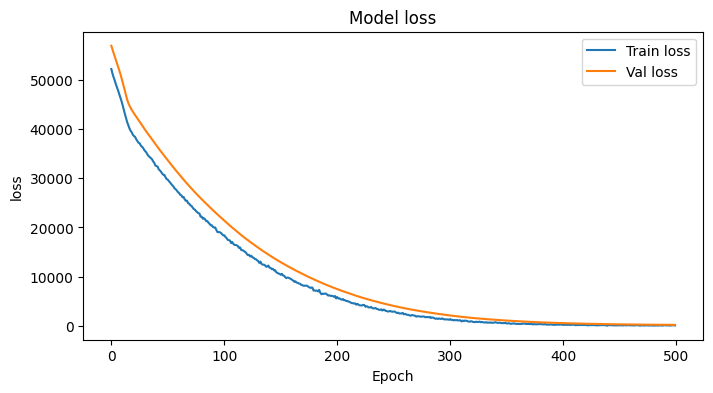

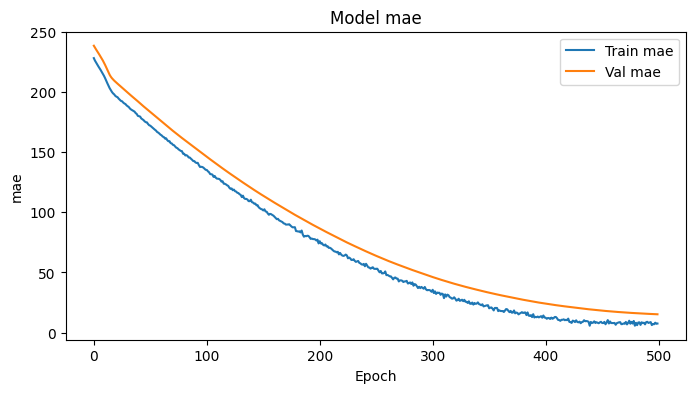

In [132]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Métricas disponibles en history.history
    metrics = ['loss', 'mae']
    for metric in metrics:
        plt.figure(figsize=(8, 4))
        plt.plot(history.history[metric], label=f'Train {metric}')
        plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
        plt.title(f'Model {metric}')
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

# Ejemplo para el modelo LSTM
plot_training_history(history_lstm)


In [133]:
# Seleccionar el modelo y los datos correspondientes
model = model_lstm  # o model_mlp, model_rnn
X_test_model = X_test if model_type == 'MLP' else X_test_rnn

# Realizar predicciones
y_pred = model.predict(X_test_model)
y_true = y_test

# Calcular métricas
metrics = calculate_metrics(y_true, y_pred)
print("Resultados de las métricas:")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value}")


1/1 [==============================] - 0s 298ms/step
Resultados de las métricas:
MAPE: 0.07181816978864013
MAE: 17.596387154715405
RMSE: 19.115734077856814
MSE: 365.4112893353363
R2: -5.551129169172268


In [134]:

# Hiperparámetros a explorar
dropout_rates = [0.2, 0.4, 0.6, 0.8]
neurons_list = [10, 100, 1000, 10000]
batch_sizes = [16, 32, 64, 128]

results = []

